<ipython-input-42-d911f7290cda>:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


{'Non different (pvalue > 0.05)': ['vm_nose(cm/s)', 'd_paws', 'Body-TailI(%)', 'Body-TailR(%)', 'TurnC(%)', 'TurnI(%)'], 'Significant differences (0.01 < p<0.05)': ['vm_pawE'], 'Even more significant difference (p < 0.01)': ['Distance(cm)', 'Moving_time(%)', 'vm_butt', 'vm_tail_end', 'vm_pawD', 'vm_pawe', 'vm_pawd', 'vm_butm', 'd_Paws', 'd_nose-but', 'Tail_curvatureC(%)', 'Tail_curvatureI(%)', 'Tail_curvatureR(%)', 'Body-TailC(%)', 'TurnR(%)']}


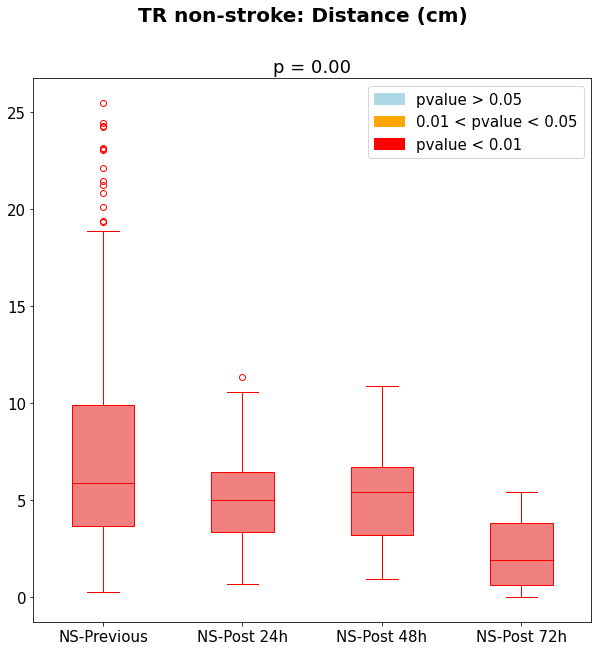

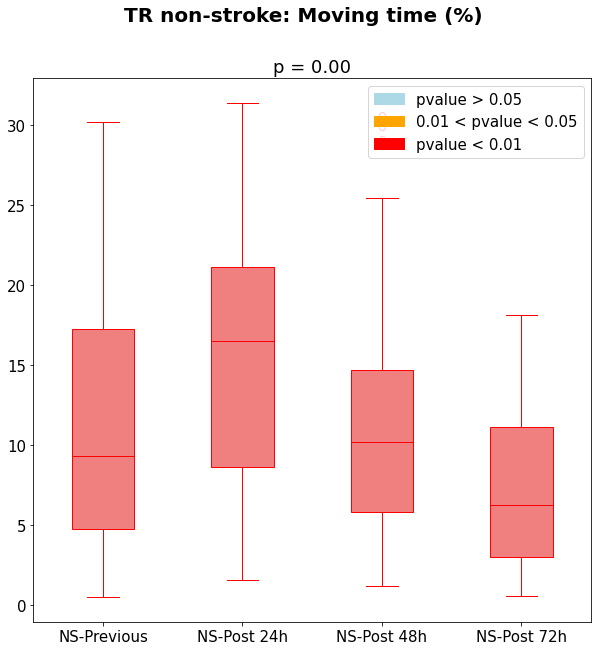

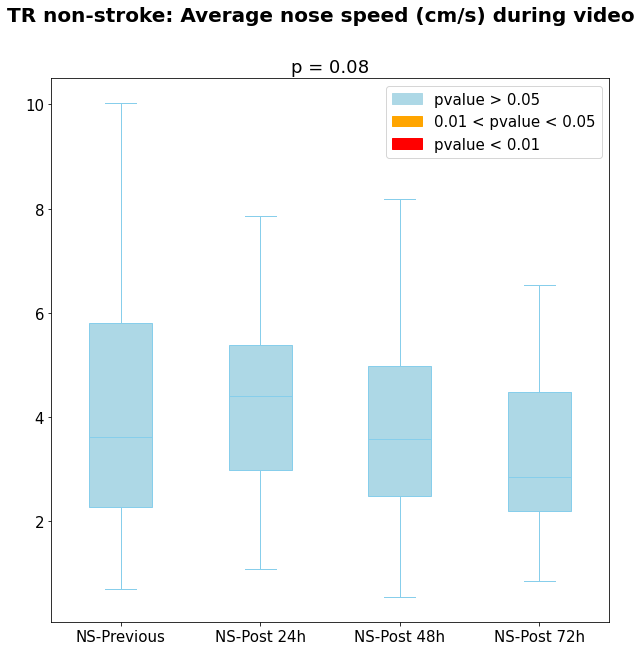

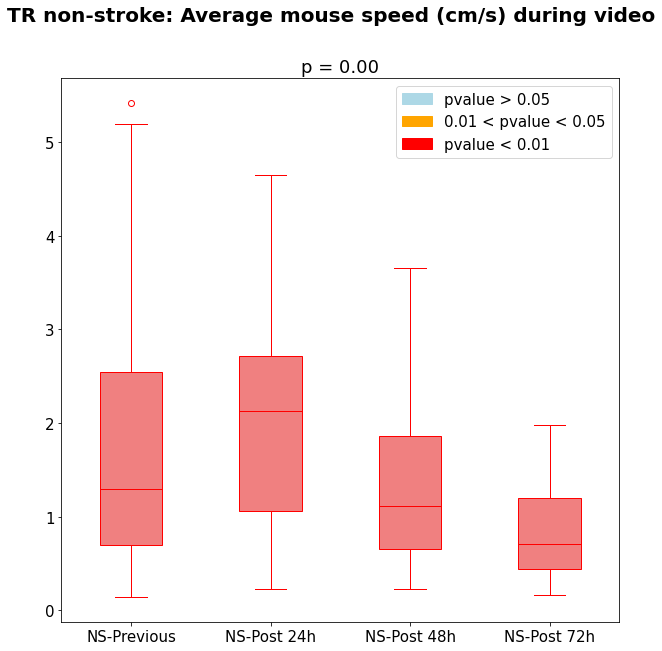

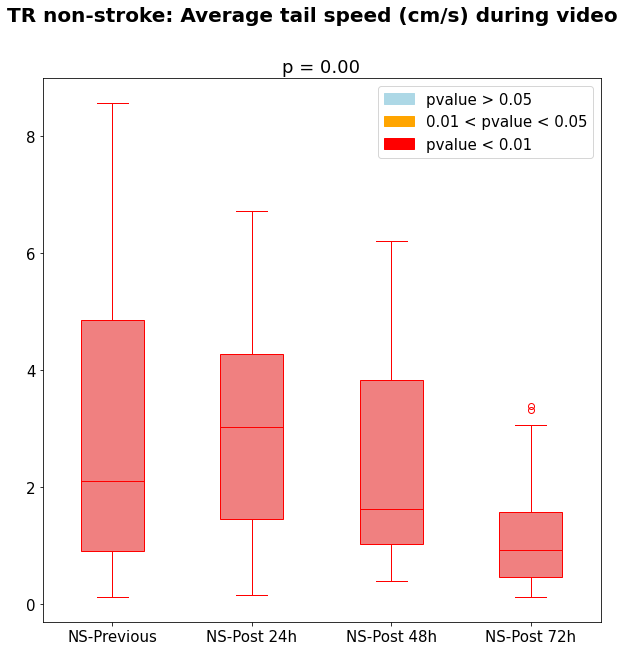

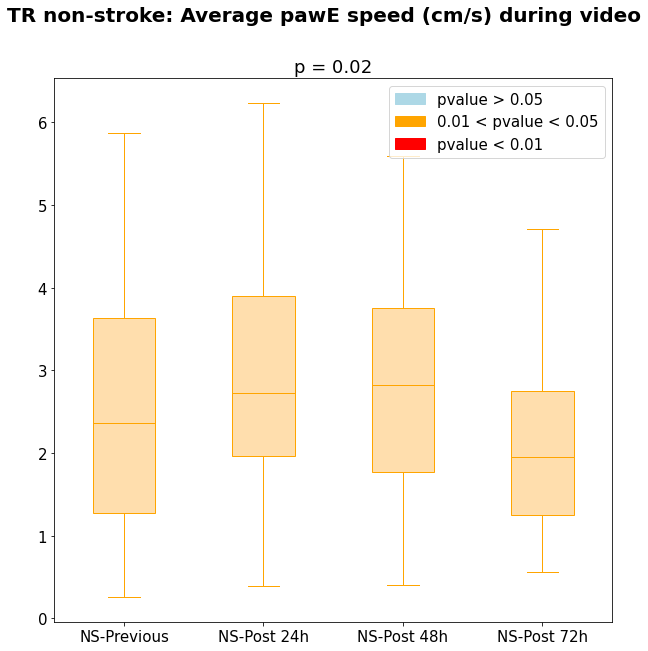

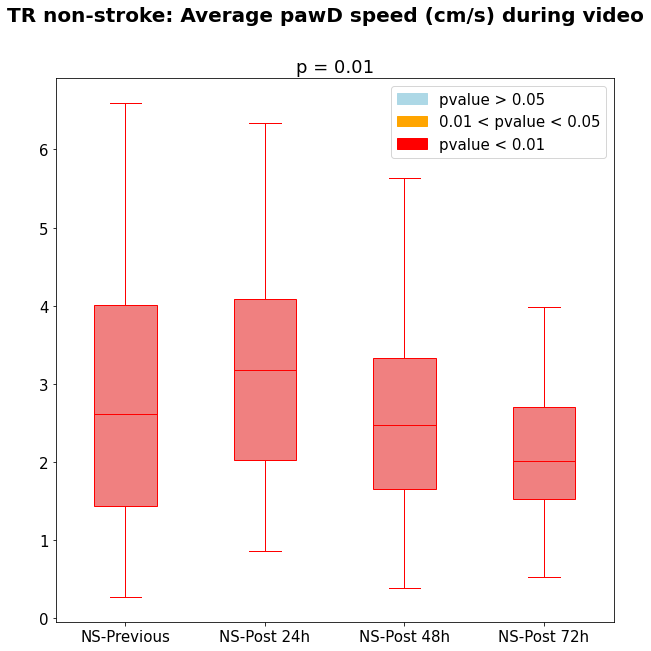

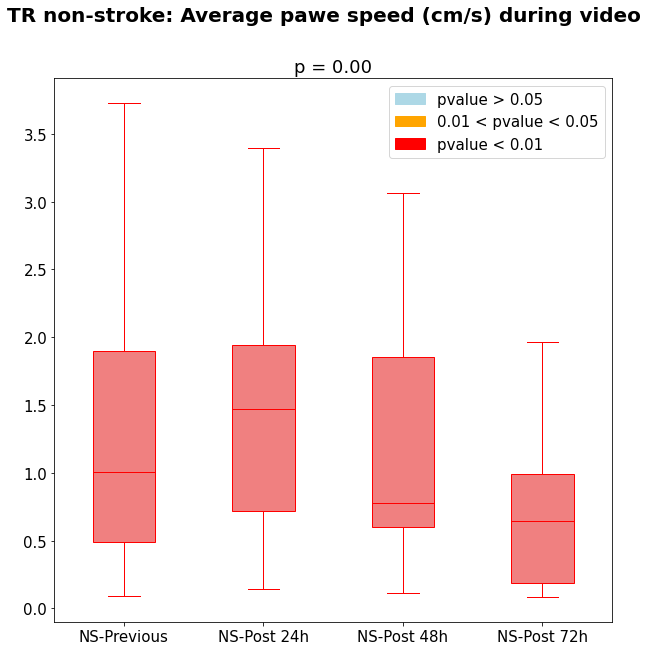

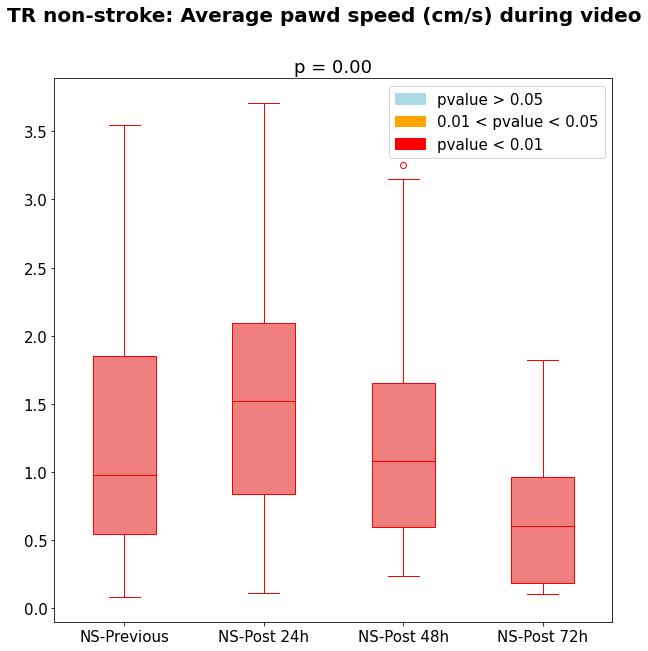

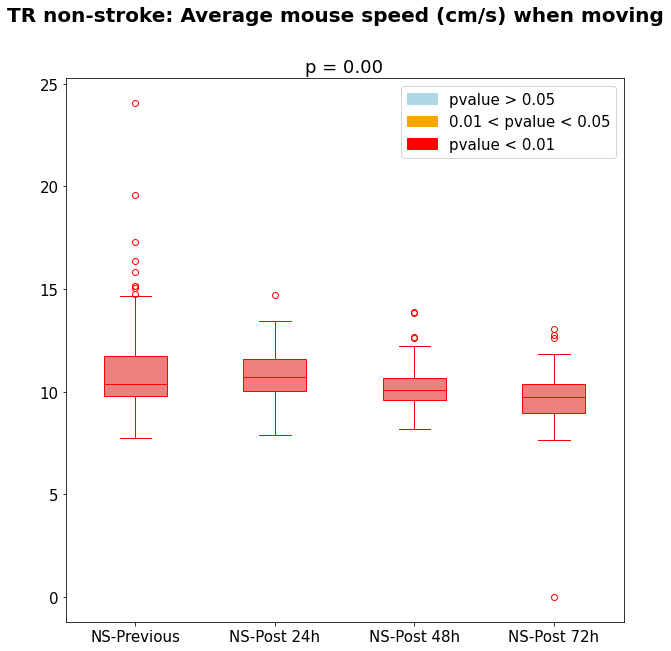

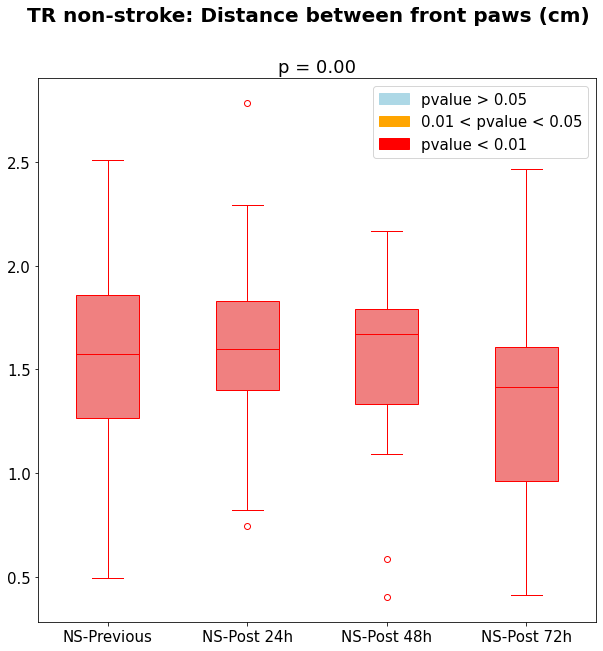

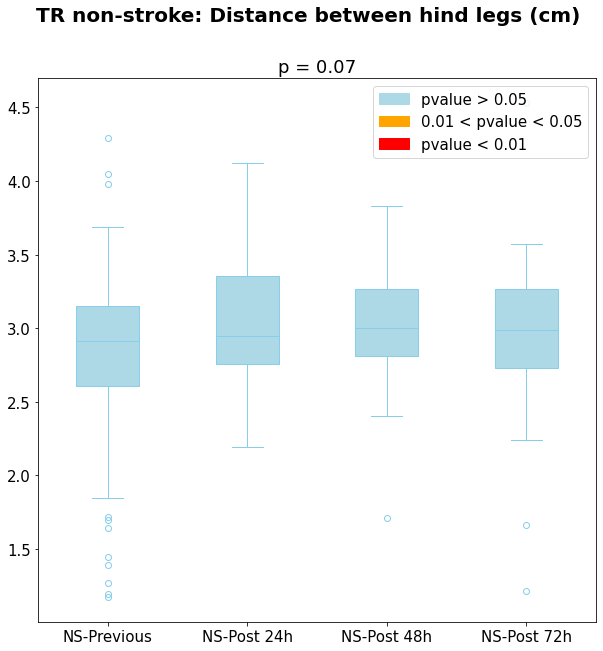

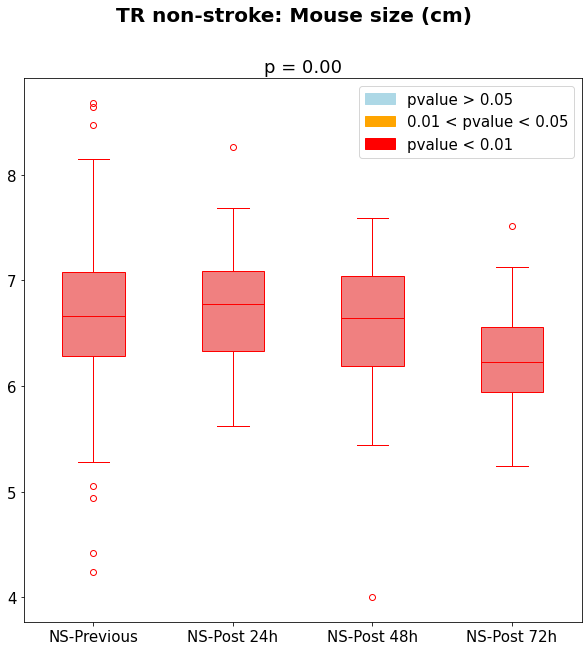

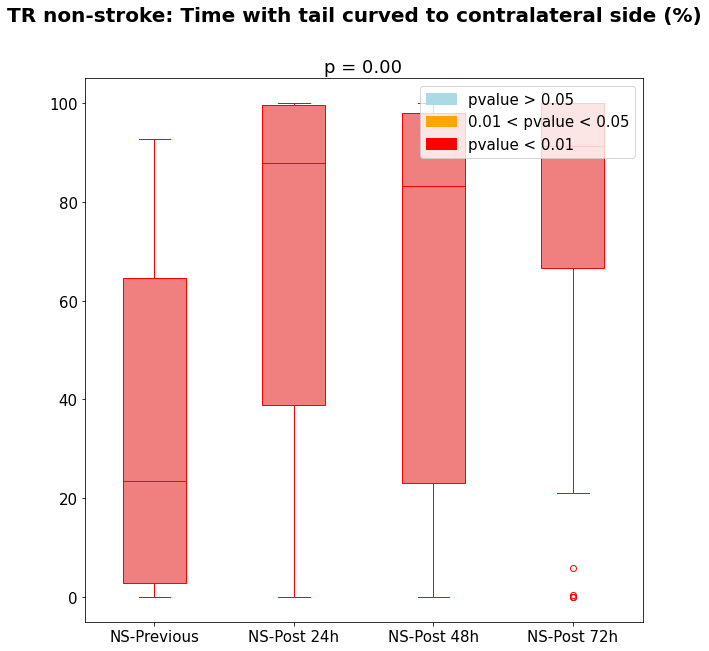

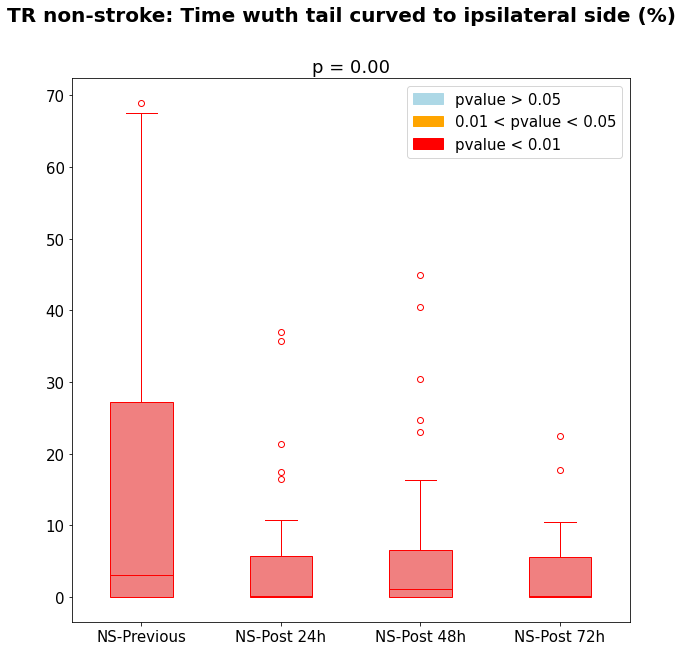

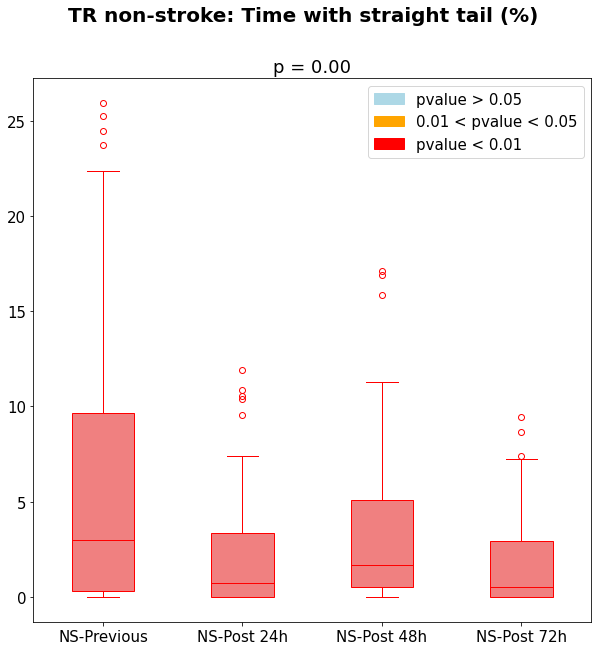

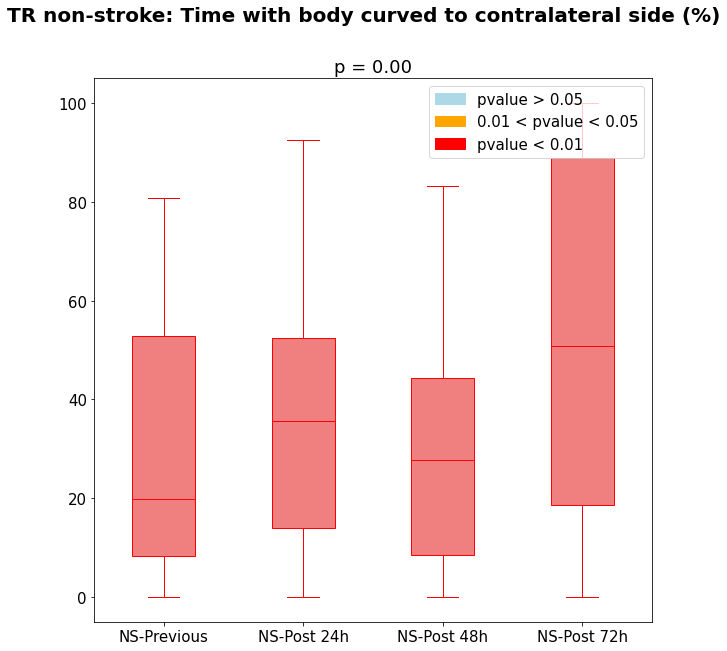

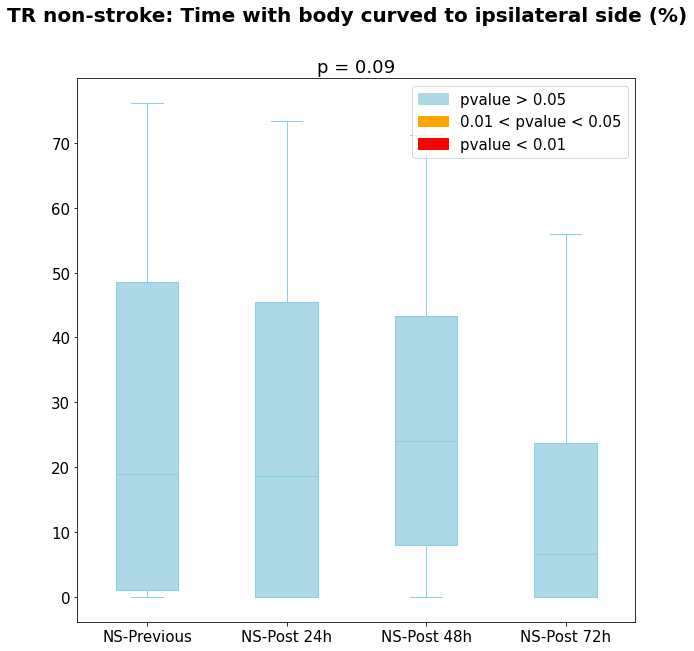

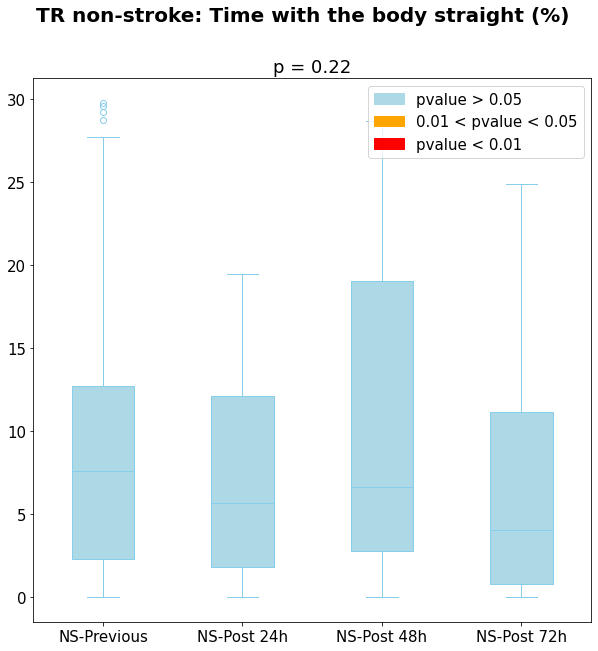

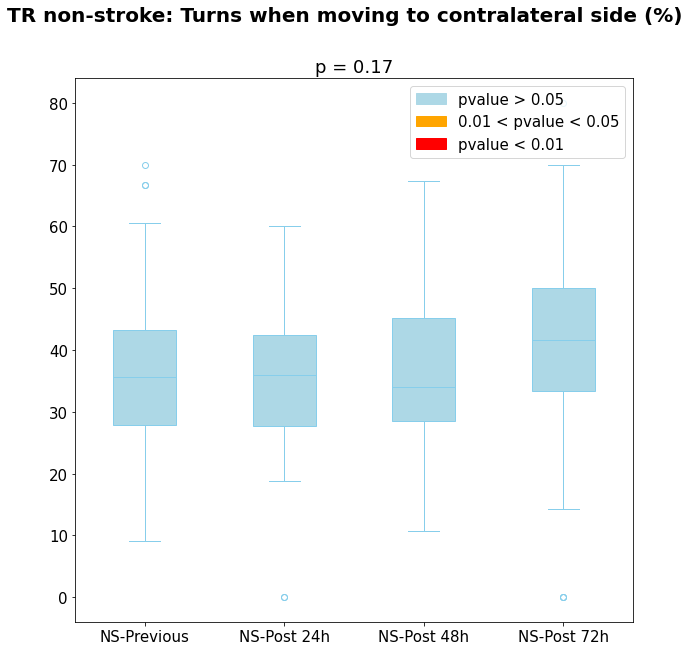

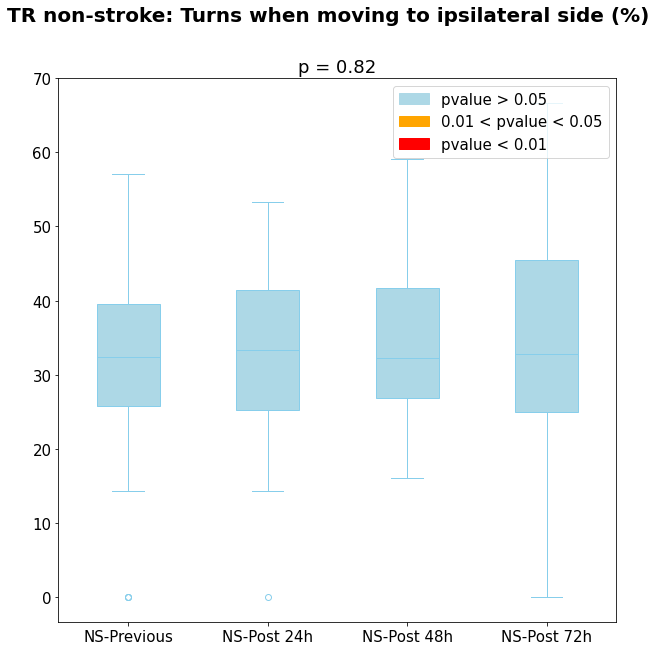

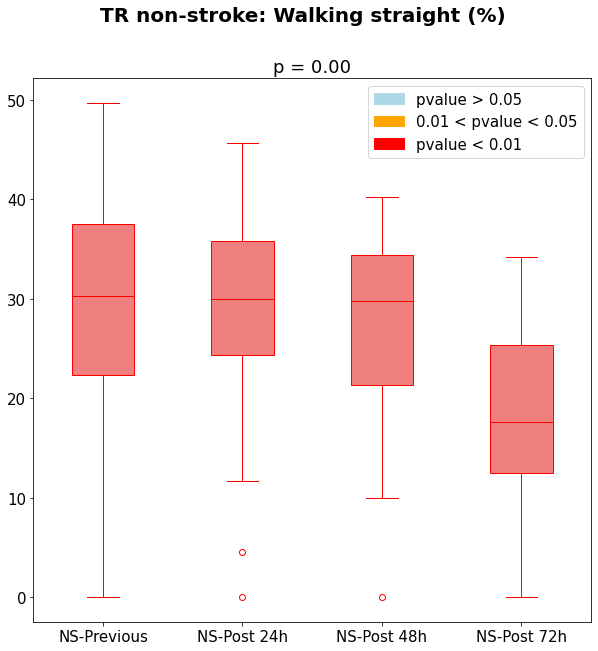

In [42]:
# -*- coding: utf-8 -*-
# -*- coding: utf-8 -*-
"""
COMBIO PROJECT: DATA ANALYSIS
Nuria Mercade & Marta Alcalde
"""

# Libraries
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats       as stats
from sklearn import preprocessing
import matplotlib.patches as mpatches

#file = "C:/Users/Marta/Dropbox/COMBIO/dades.xlsx"
file = "/Users/nmercade/Desktop/dades.xlsx"
data = pd.read_excel(file,header = 0, usecols = "A,B,H:AD")
data = data.drop(342)

# =============================================================================
# Analisys of no stroke results
# =============================================================================

limits = np.array([1,30,100,0])

infart = pd.DataFrame([4.7,20.50,4.1,49.5,0,0,0,0,7,27.1,38,0,36.1,0,0,0,56.5,\
                       40.4,0,0,35,22.7,0,0,42.1])
param = list(data.head()); param = param[3:]
title = ["Distance (cm)", "Moving time (%)", \
         "Average nose speed (cm/s) during video", \
         "Average mouse speed (cm/s) during video", \
         "Average tail speed (cm/s) during video", \
         "Average pawE speed (cm/s) during video", \
         "Average pawD speed (cm/s) during video",\
         "Average pawe speed (cm/s) during video", \
         "Average pawd speed (cm/s) during video", \
         "Average mouse speed (cm/s) when moving", \
         "Distance between front paws (cm)", \
         "Distance between hind legs (cm)", \
         "Mouse size (cm)", \
         "Time with tail curved to contralateral side (%)", \
         "Time wuth tail curved to ipsilateral side (%)", \
         "Time with straight tail (%)", \
         "Time with body curved to contralateral side (%)",\
         "Time with body curved to ipsilateral side (%)", \
         "Time with the body straight (%)", \
         "Turns when moving to contralateral side (%)", \
         "Turns when moving to ipsilateral side (%)", \
         "Walking straight (%)" ]

title1 = ["Distance (cm)", "Moving time (%)", \
         "Average nose speed (cm/s)", \
         "Average speed (cm/s)", \
         "Average tail speed (cm/s)", \
         "Average pawE speed (cm/s)", \
         "Average pawD speed (cm/s)",\
         "Average pawe speed (cm/s)", \
         "Average pawd speed (cm/s)", \
         "Average mouse speed (cm/s)", \
         "Distance between front paws (cm)", \
         "Distance between hind legs (cm)", \
         "Mouse size (cm)", \
         "Time with tail curved to contralateral side (%)", \
         "Time wuth tail curved to ipsilateral side (%)", \
         "Time with straight tail (%)", \
         "Time with body curved to contralateral side (%)",\
         "Time with body curved to ipsilateral side (%)", \
         "Time with the body straight (%)", \
         "Turns when moving to contralateral side (%)", \
         "Turns when moving to ipsilateral side (%)", \
         "Walking straight (%)" ]
noncorrelated=[]; smallcorrelation=[]; strongcorrelation=[]
for k,i in enumerate(param):
    # PREVIOUS NON STROKE
    trpre = data.loc[data["Test"] == "TR - PRE"]; 
    trpre_1 = trpre.loc[(trpre["% Infarct"] <= limits[0]) & (trpre["% Infarct"] >= 0)]
    trpre_1 = np.array(trpre_1[i].dropna())
    trpre_1 = trpre_1[trpre_1 <= (np.mean(trpre_1)*0.9 + np.mean(trpre_1))]
    
    # POST 24H NON STROKE
    trpost24h = data.loc[data["Test"] == "TR - POST - 24H"]; 
    trpost24h_1 = trpost24h.loc[(trpost24h["% Infarct"] <= limits[0]) & (trpost24h["% Infarct"] >= 0)]
    trpost24h_1 = np.array(trpost24h_1[i].dropna())
    trpost24h_1 = trpost24h_1[trpost24h_1 <= (np.mean(trpost24h_1)*0.9 + np.mean(trpost24h_1))]
    
    # POST 48H NON STROKE
    trpost48h = data.loc[data["Test"] == "TR - POST - 48H"]; 
    trpost48h_1 = trpost48h.loc[(trpost48h["% Infarct"] <= limits[0]) & (trpost48h["% Infarct"] >= 0)]
    trpost48h_1 = np.array(trpost48h_1[i].dropna())
    trpost48h_1 = trpost48h_1[trpost48h_1 <= (np.mean(trpost48h_1)*0.9 + np.mean(trpost48h_1))]
    
    # POST 72H NON STROKE
    trpost72h = data.loc[data["Test"] == "TR - POST - 72H"]; 
    trpost72h_1 = trpost72h.loc[(trpost72h["% Infarct"] <= limits[0]) & (trpost72h["% Infarct"] >= 0)]
    trpost72h_1 = np.array(trpost72h_1[i].dropna())
    trpost72h_1 = trpost72h_1[trpost72h_1 <= (np.mean(trpost72h_1)*0.9 + np.mean(trpost72h_1))]
    
    nonstroke=[trpre_1, trpost24h_1, trpost48h_1, trpost72h_1]
    
    plt.figure(figsize=(10,10))
    fvalue, pvalue = stats.f_oneway(trpre_1, trpost24h_1, trpost48h_1, trpost72h_1)
    
    if pvalue > 0.05:
        boxcolor = 'skyblue'
        incolor = 'lightblue'
        noncorrelated.append(i)

    if (pvalue < 0.05) and (pvalue > 0.01):
        boxcolor = 'orange'
        incolor = 'navajowhite'
        smallcorrelation.append(i)
    if pvalue < 0.01:
        boxcolor = 'red'
        incolor = 'lightcoral'
        strongcorrelation.append(i)
        
    box = plt.boxplot(nonstroke, labels = ('NS-Previous','NS-Post 24h','NS-Post 48h',\
                                    'NS-Post 72h'), patch_artist = True)
    plt.suptitle('TR non-stroke: {}'.format(title[k]), fontsize=20, fontweight = 'bold')
    plt.title('p = {:.2f}'.format(pvalue), fontsize=18)
    red_patch = mpatches.Patch(color='red', label='pvalue < 0.01')
    orange_patch = mpatches.Patch(color='orange', label='0.01 < pvalue < 0.05')
    blue_patch = mpatches.Patch(color='lightblue', label='pvalue > 0.05')
    plt.legend(handles=[blue_patch, orange_patch, red_patch], fontsize=15, loc='upper right')
    plt.tick_params(labelsize = 15)

    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box[item], color = boxcolor)
        plt.setp(box["boxes"], facecolor = incolor)
        plt.setp(box["fliers"], markeredgecolor = boxcolor)
    
    path = './NOstroke/TRjoin{}.png'.format(k)
    plt.savefig(path)
info = {'Non different (pvalue > 0.05)': noncorrelated, 'Significant differences (0.01 < p<0.05)': smallcorrelation, 'Even more significant difference (p < 0.01)': strongcorrelation}
print(info)

<ipython-input-41-caa7107a782a>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(25,13))


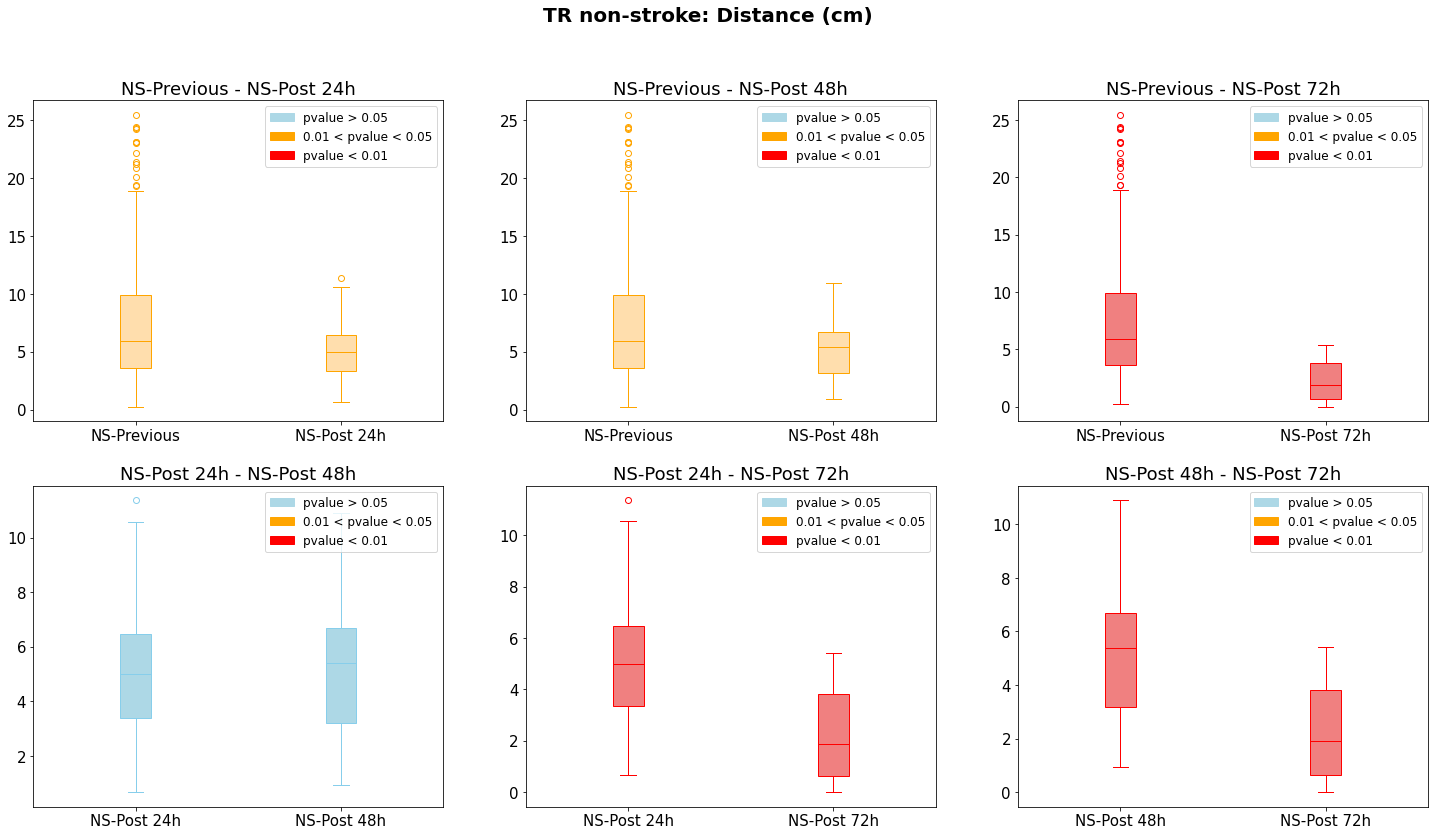

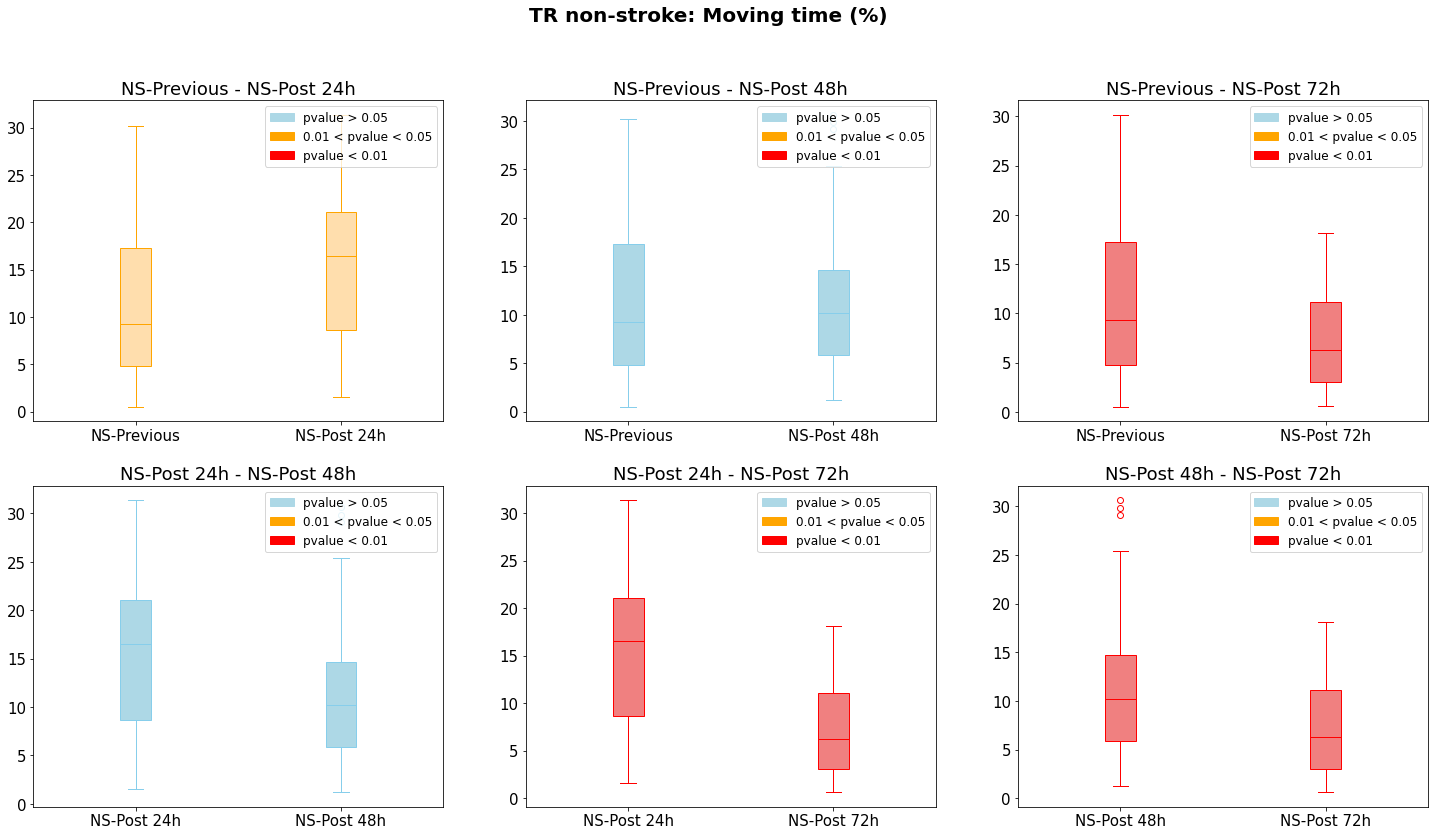

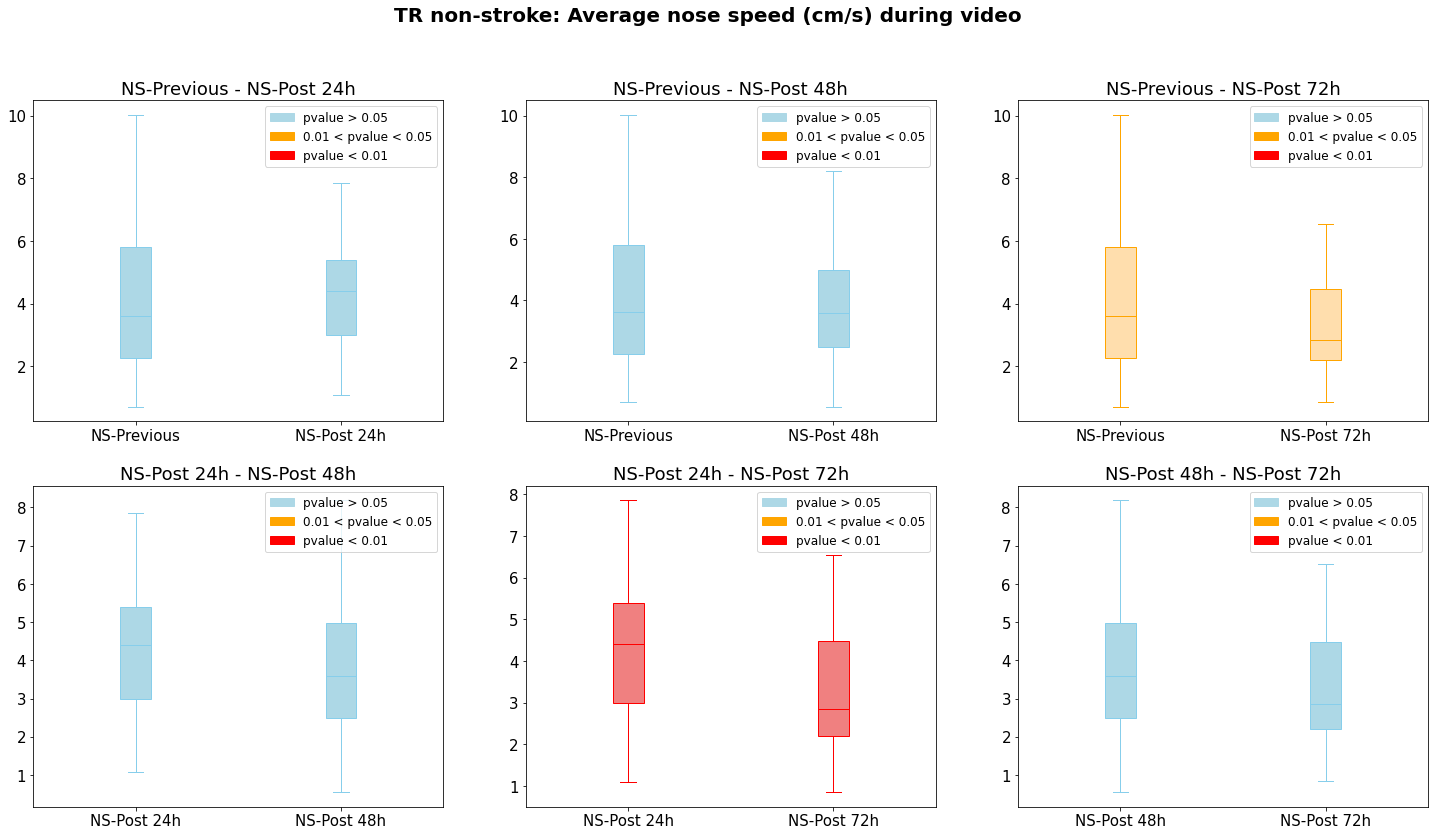

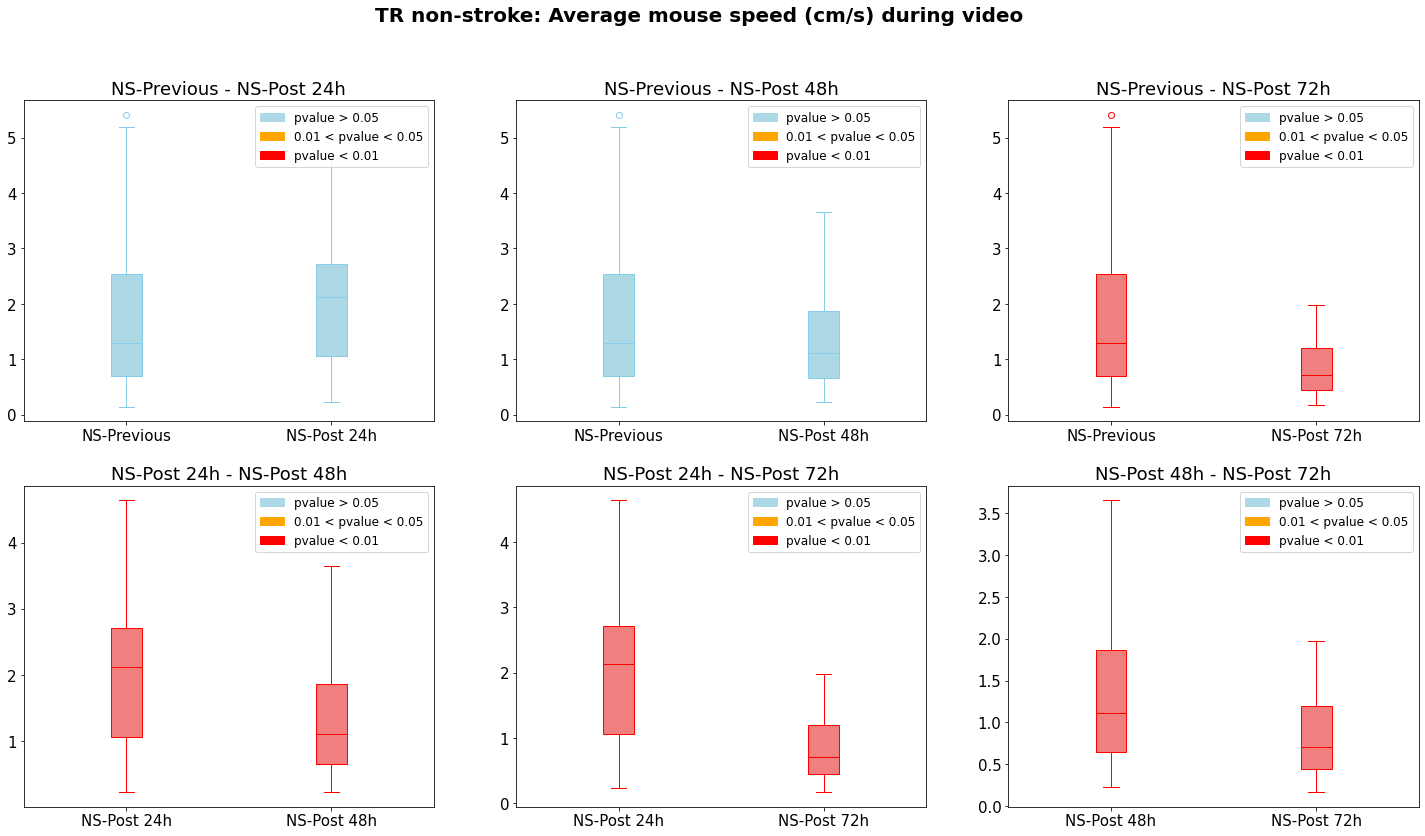

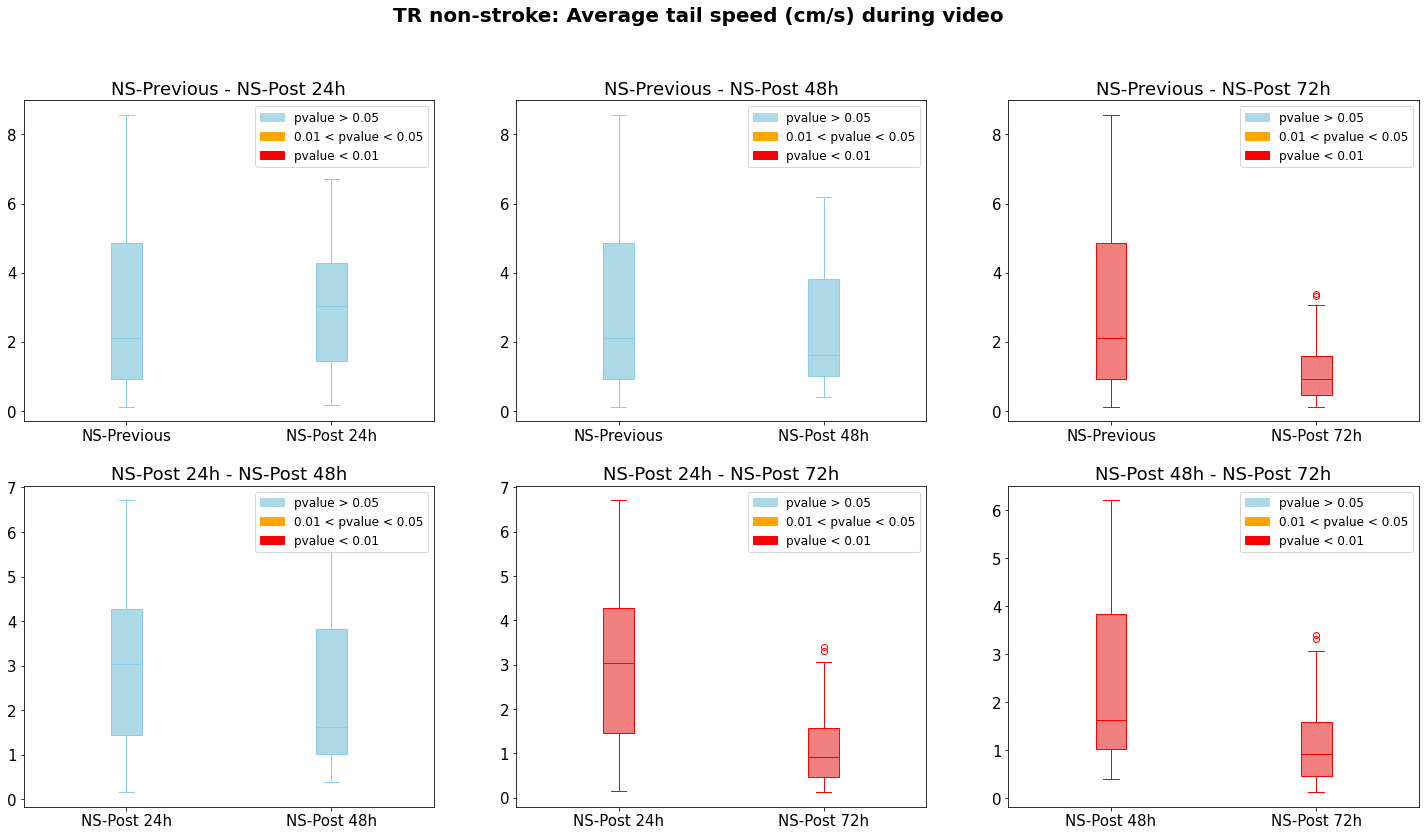

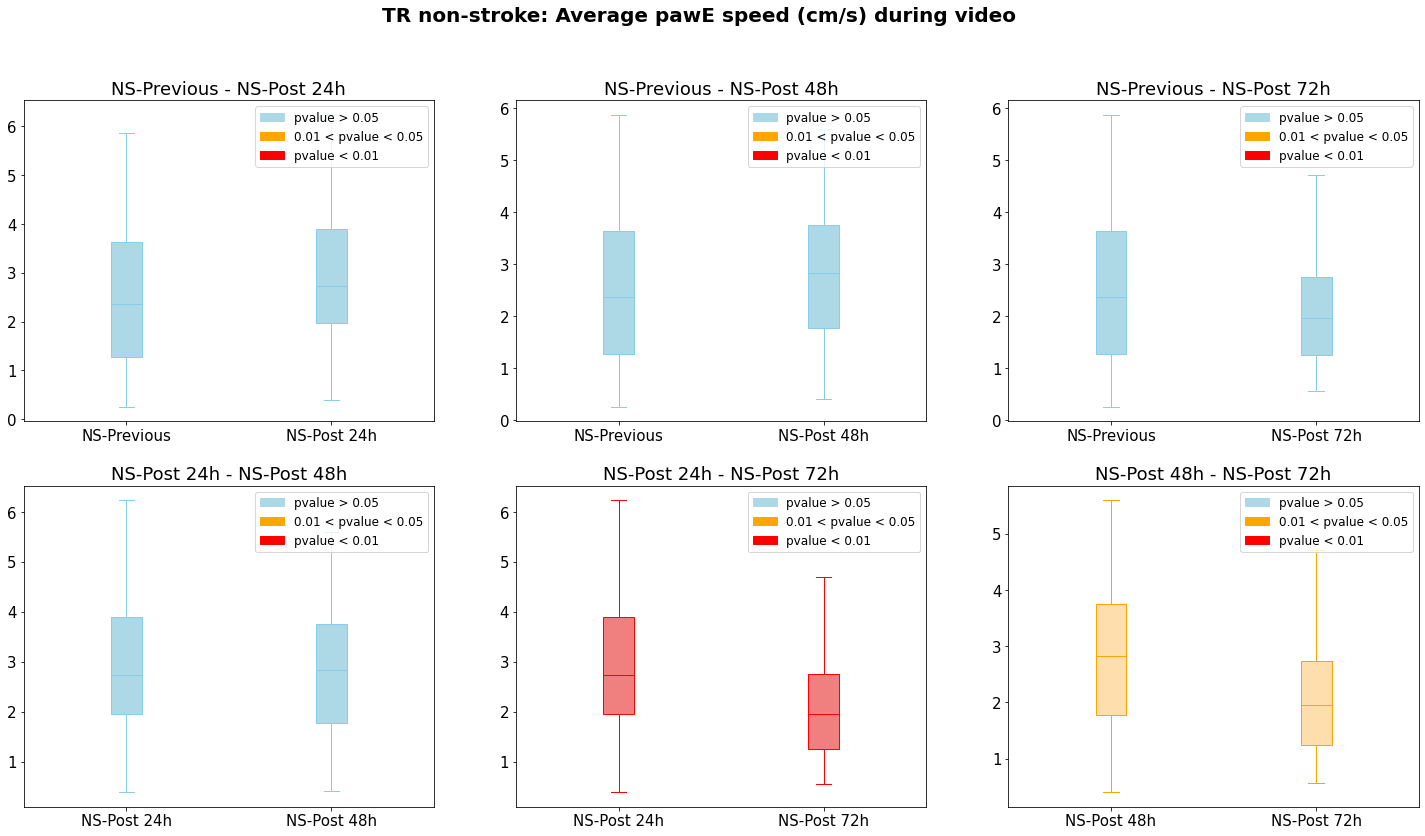

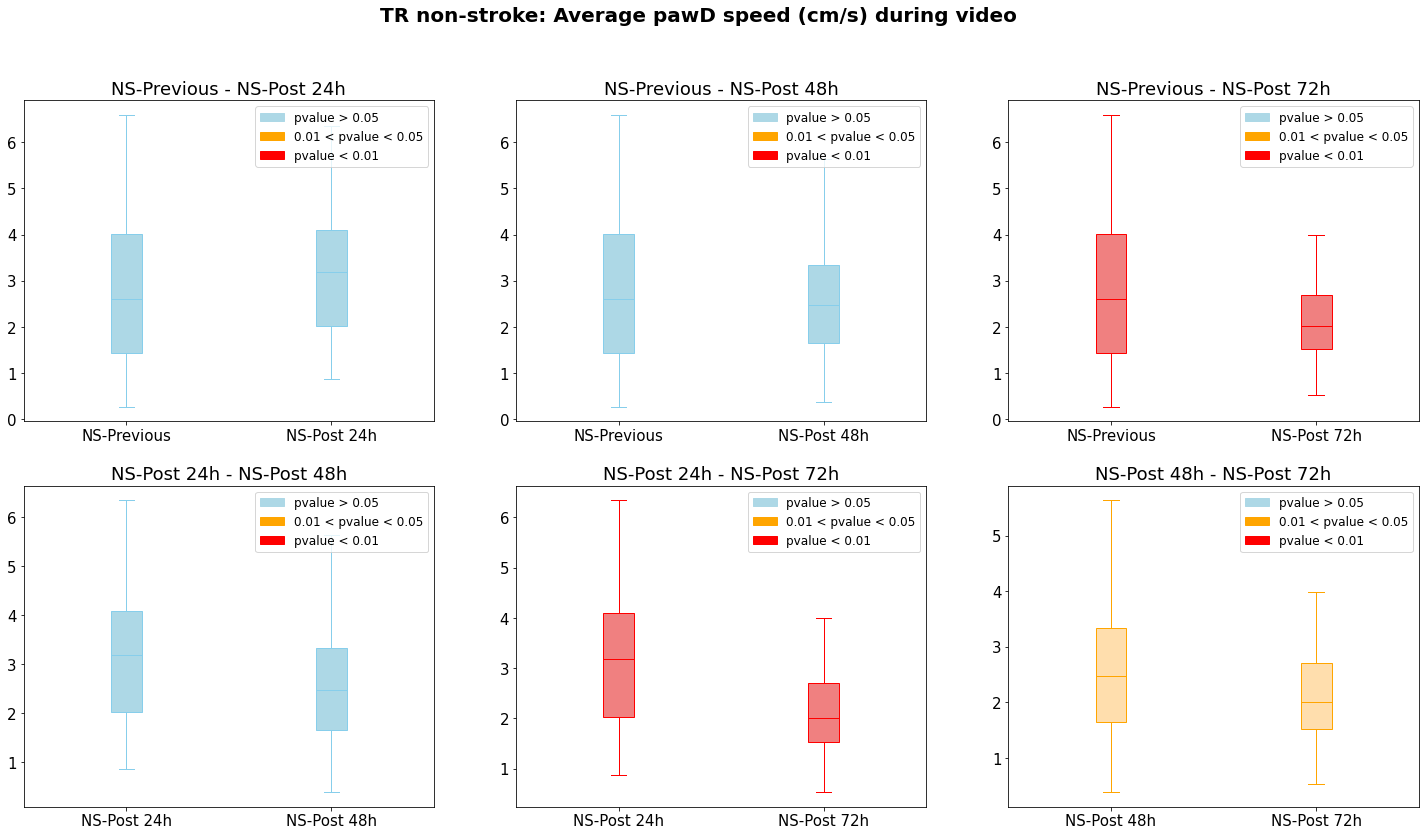

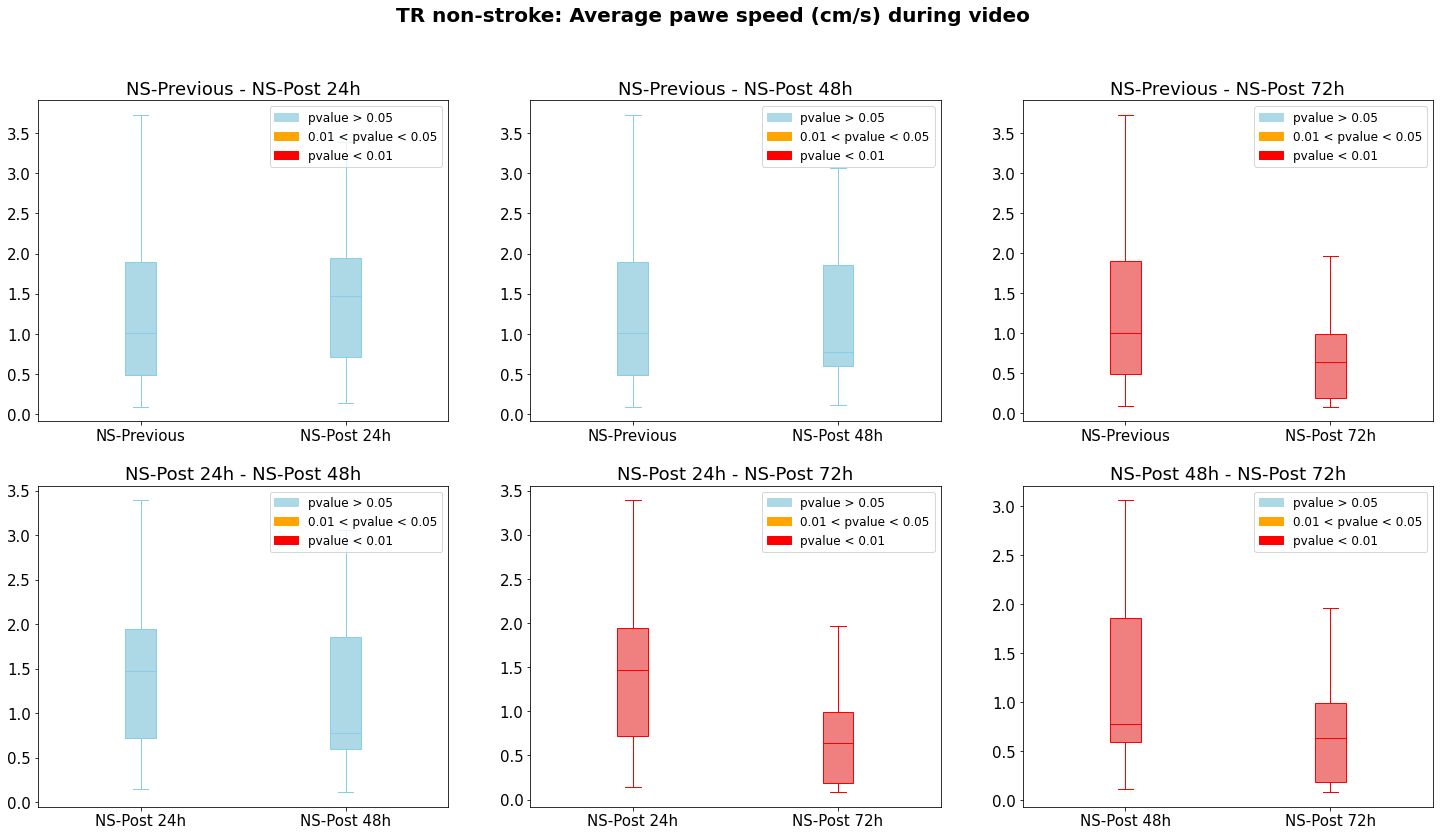

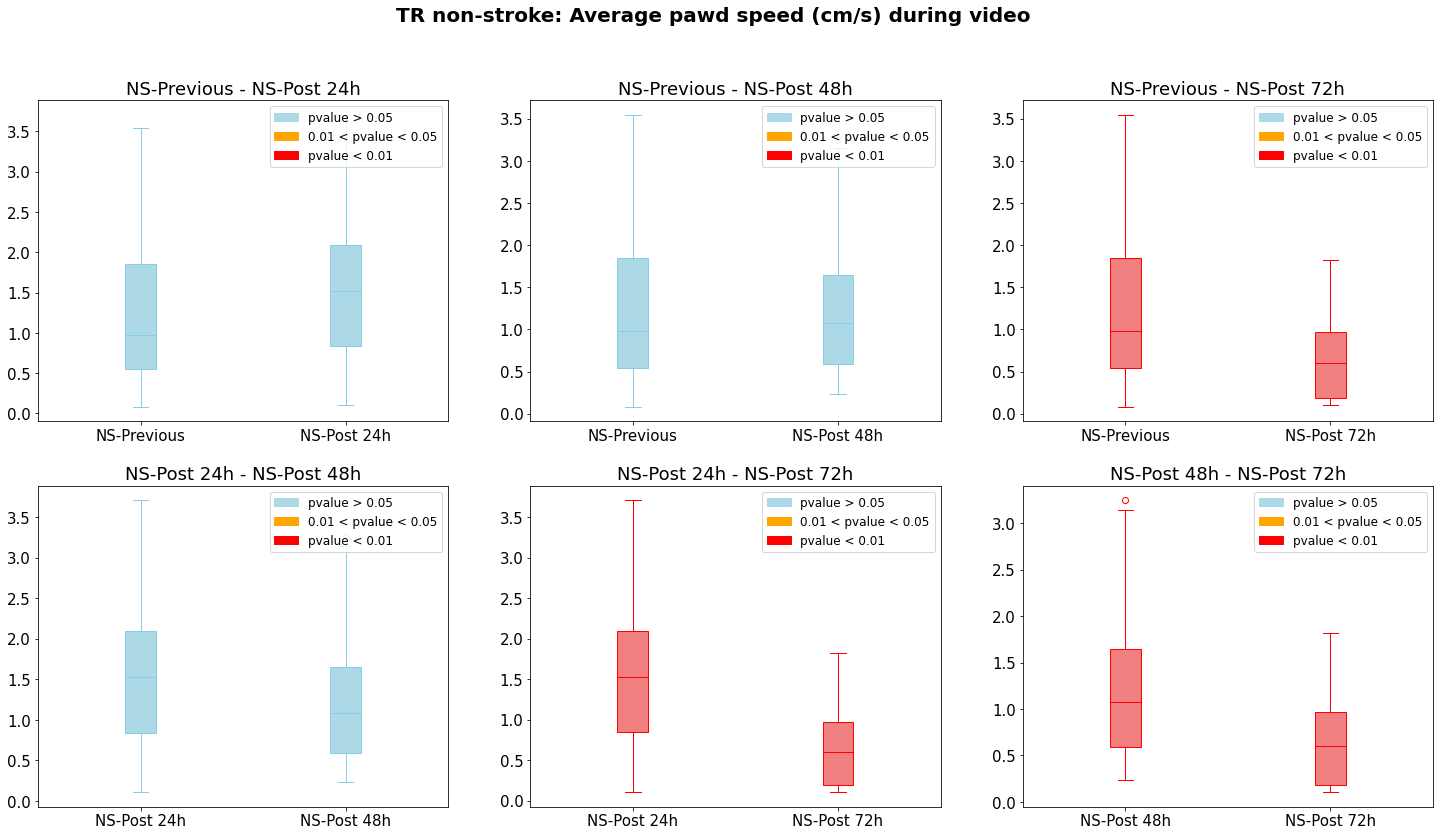

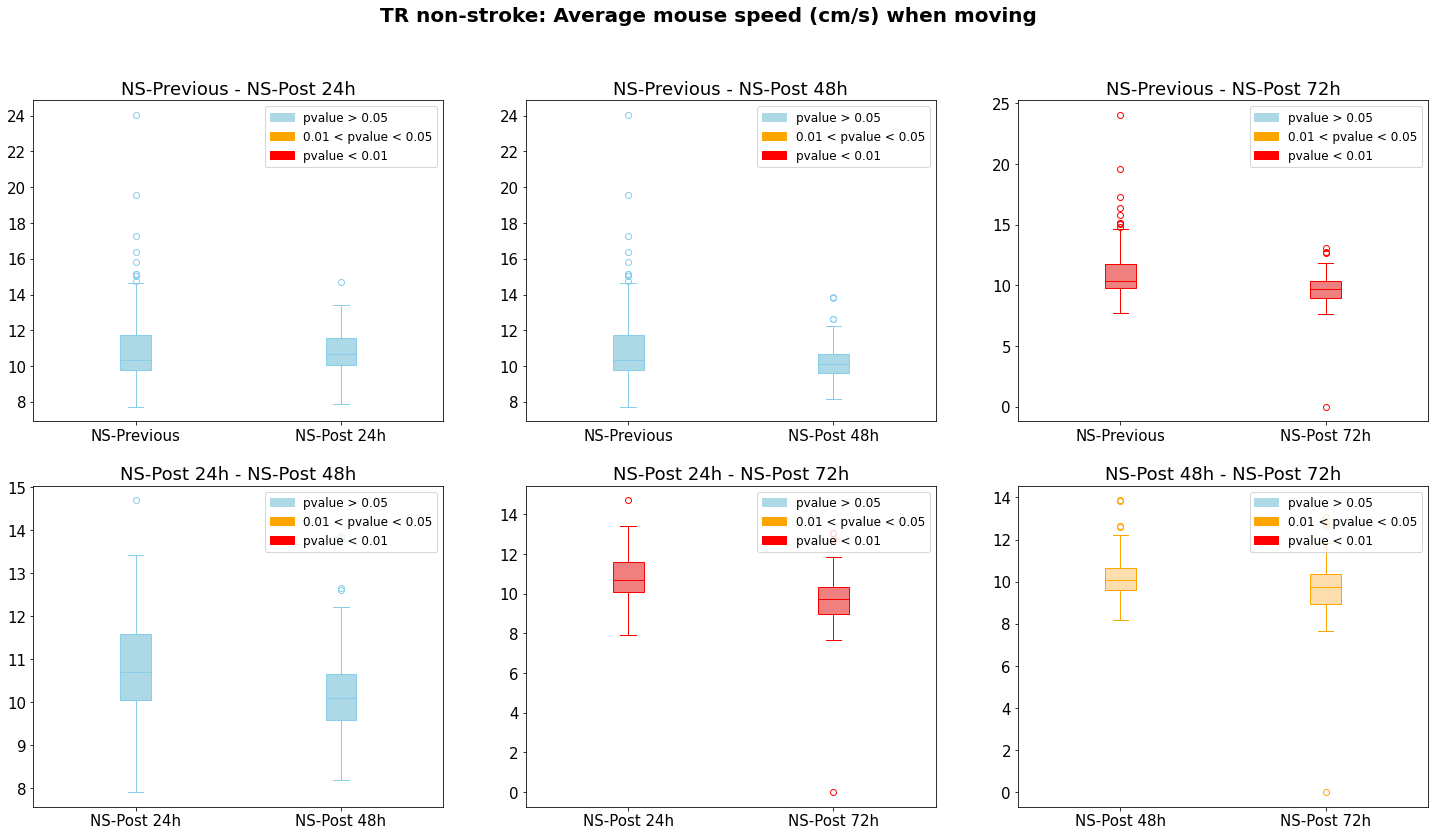

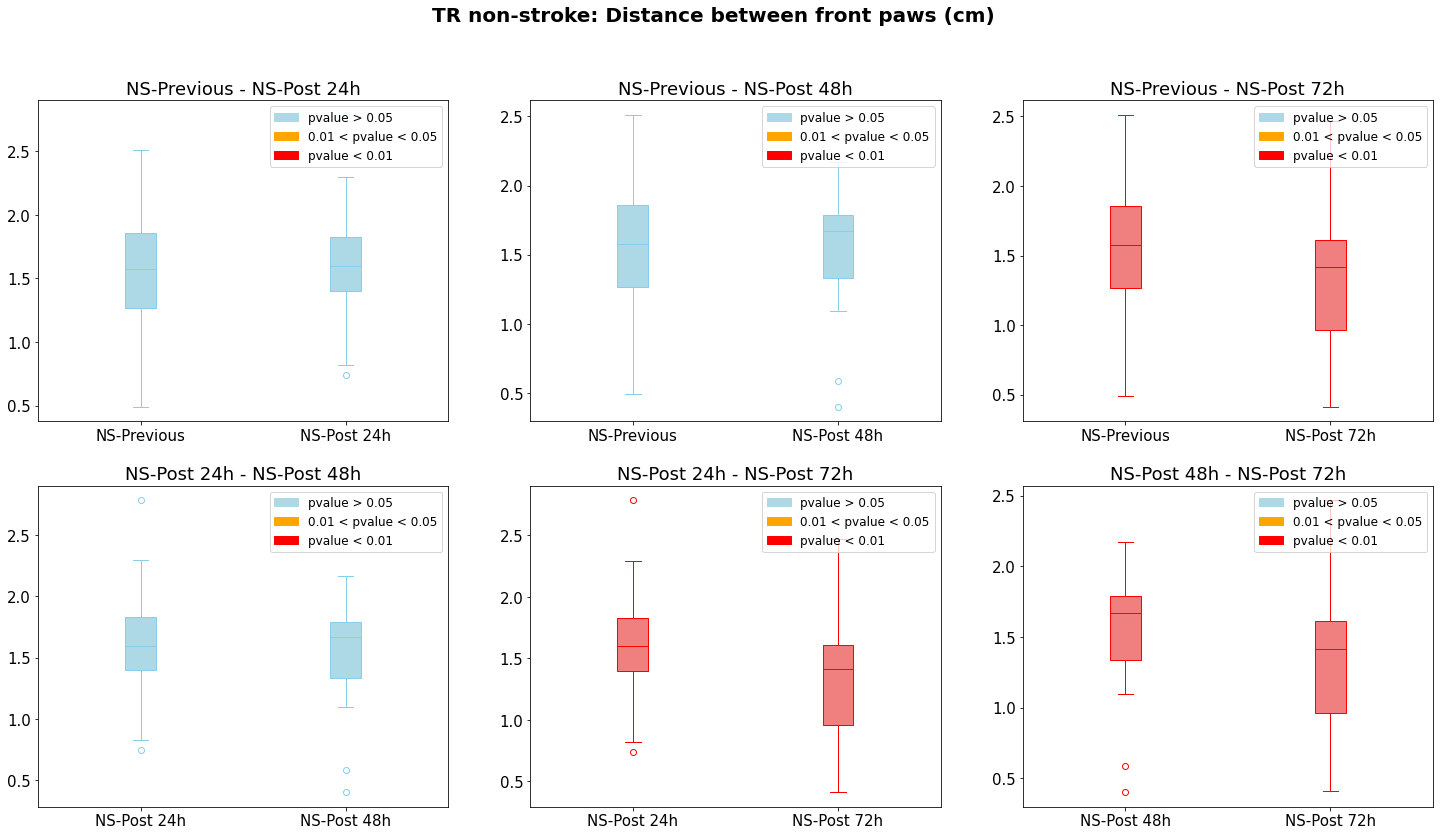

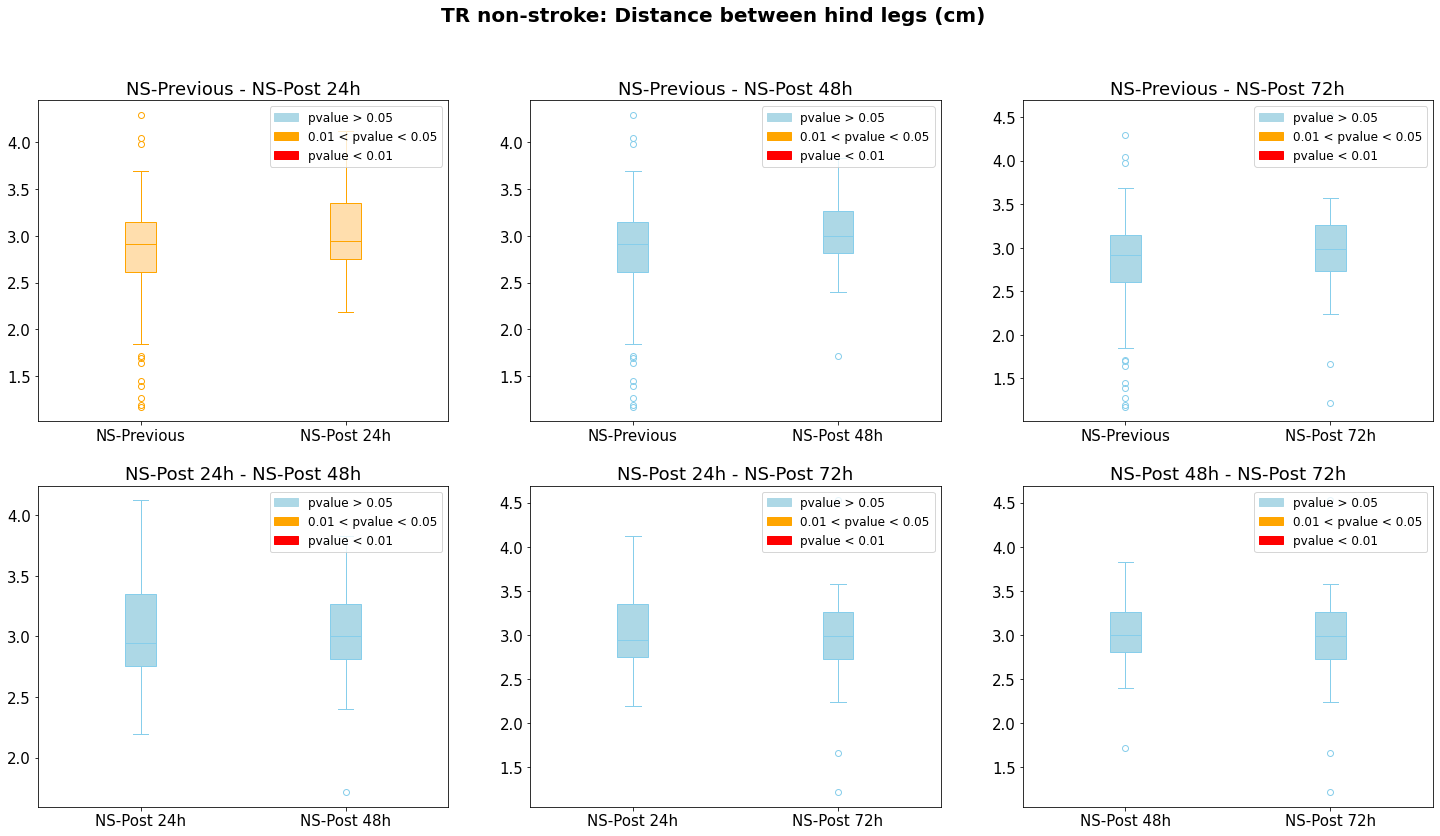

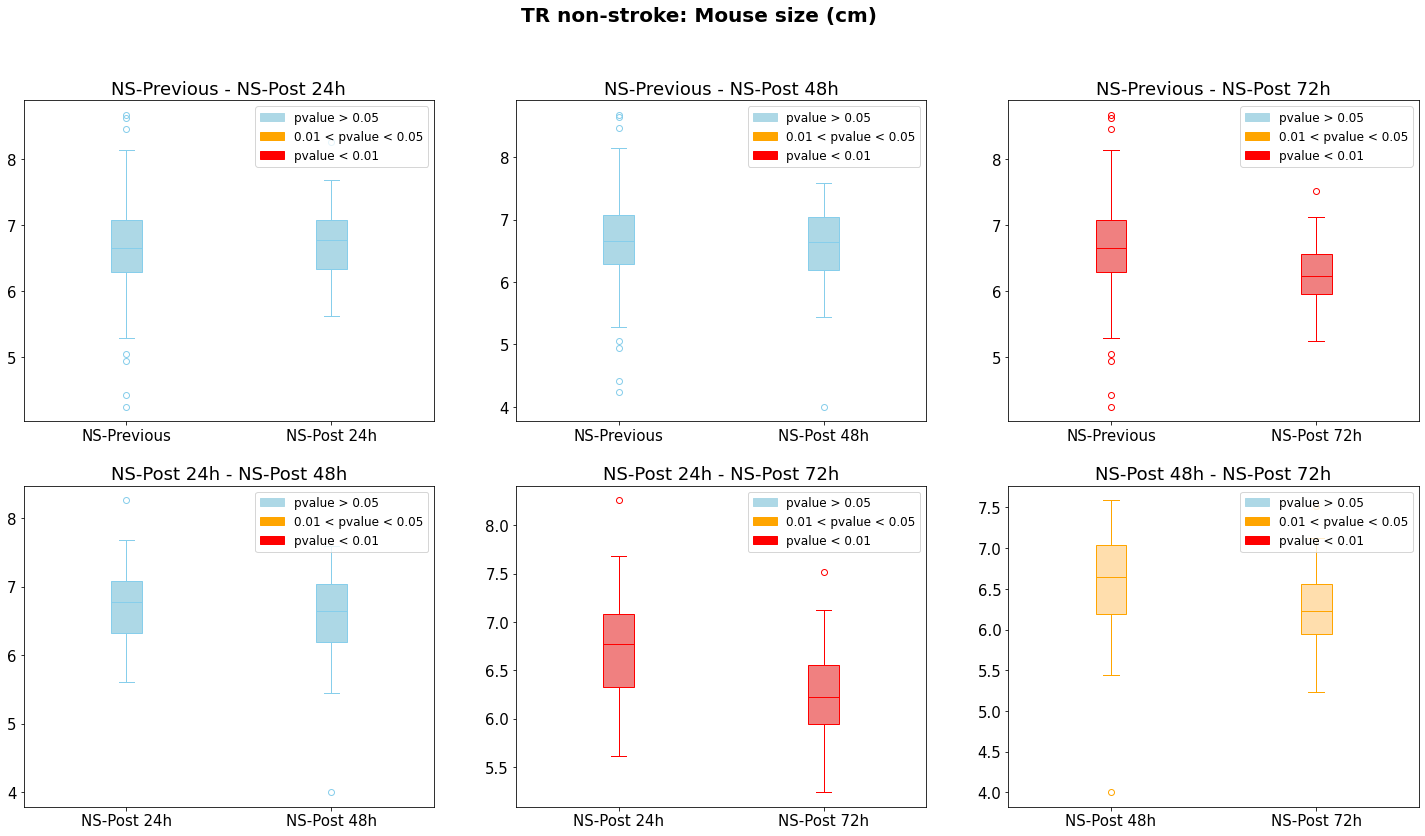

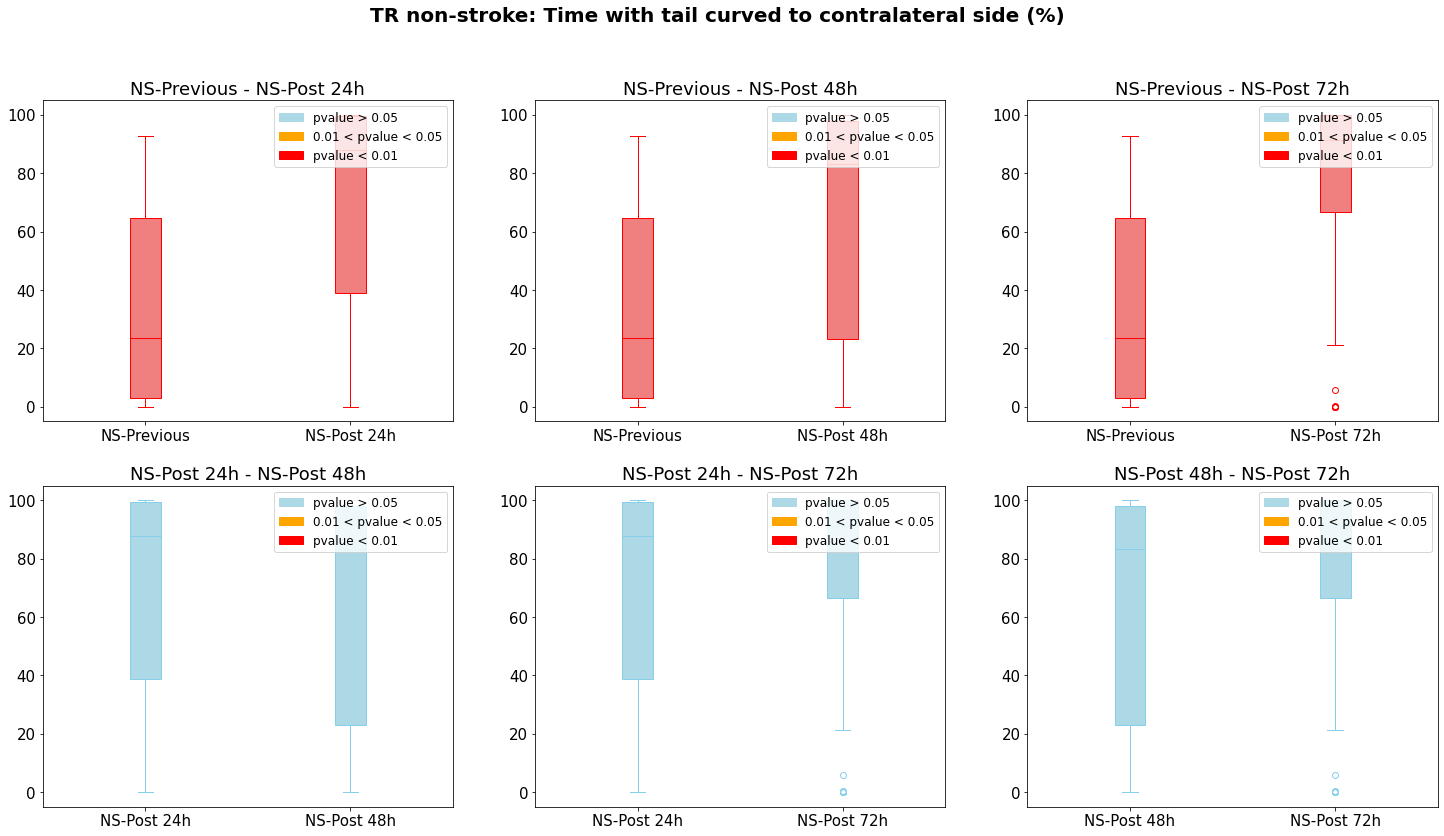

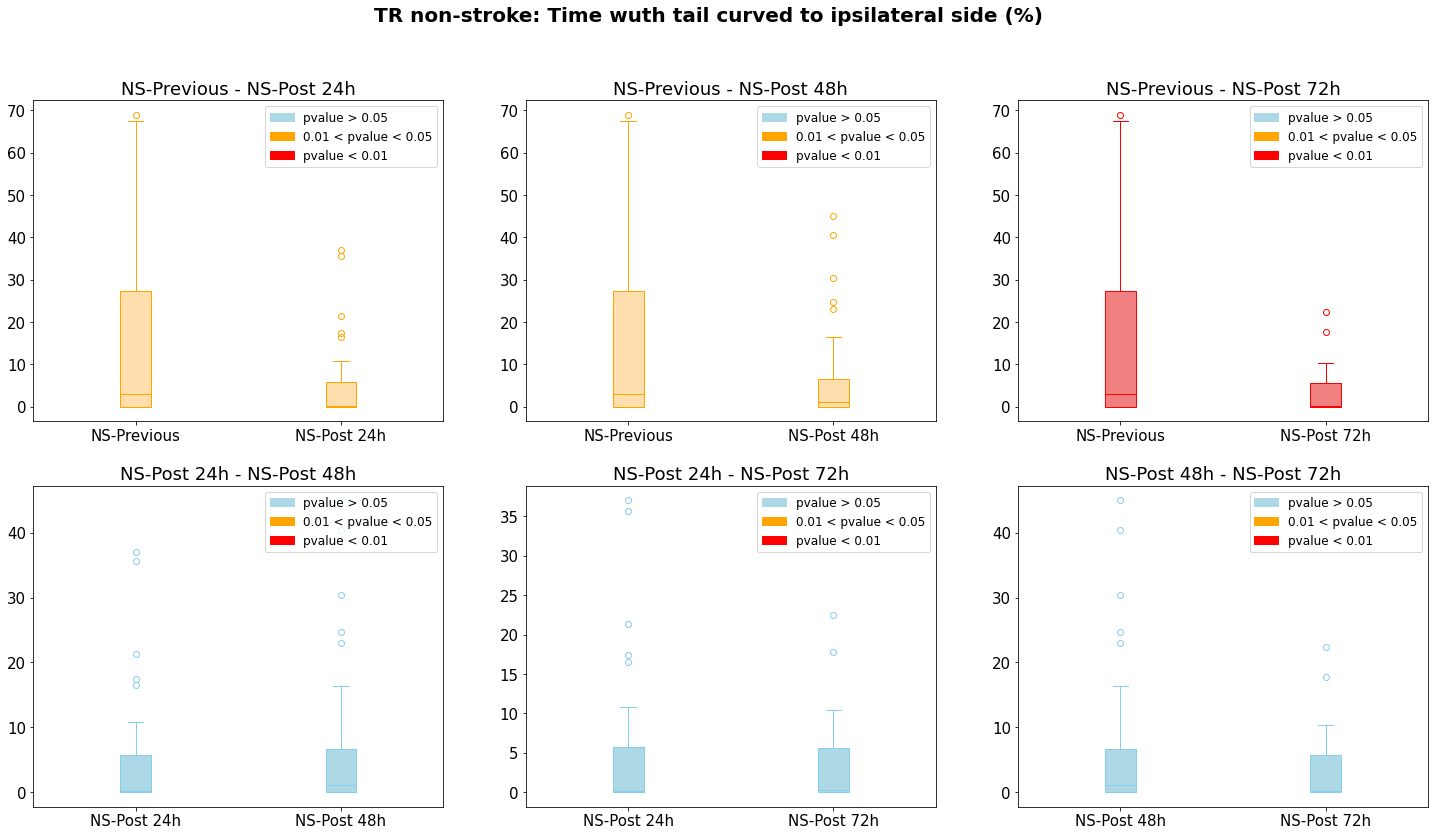

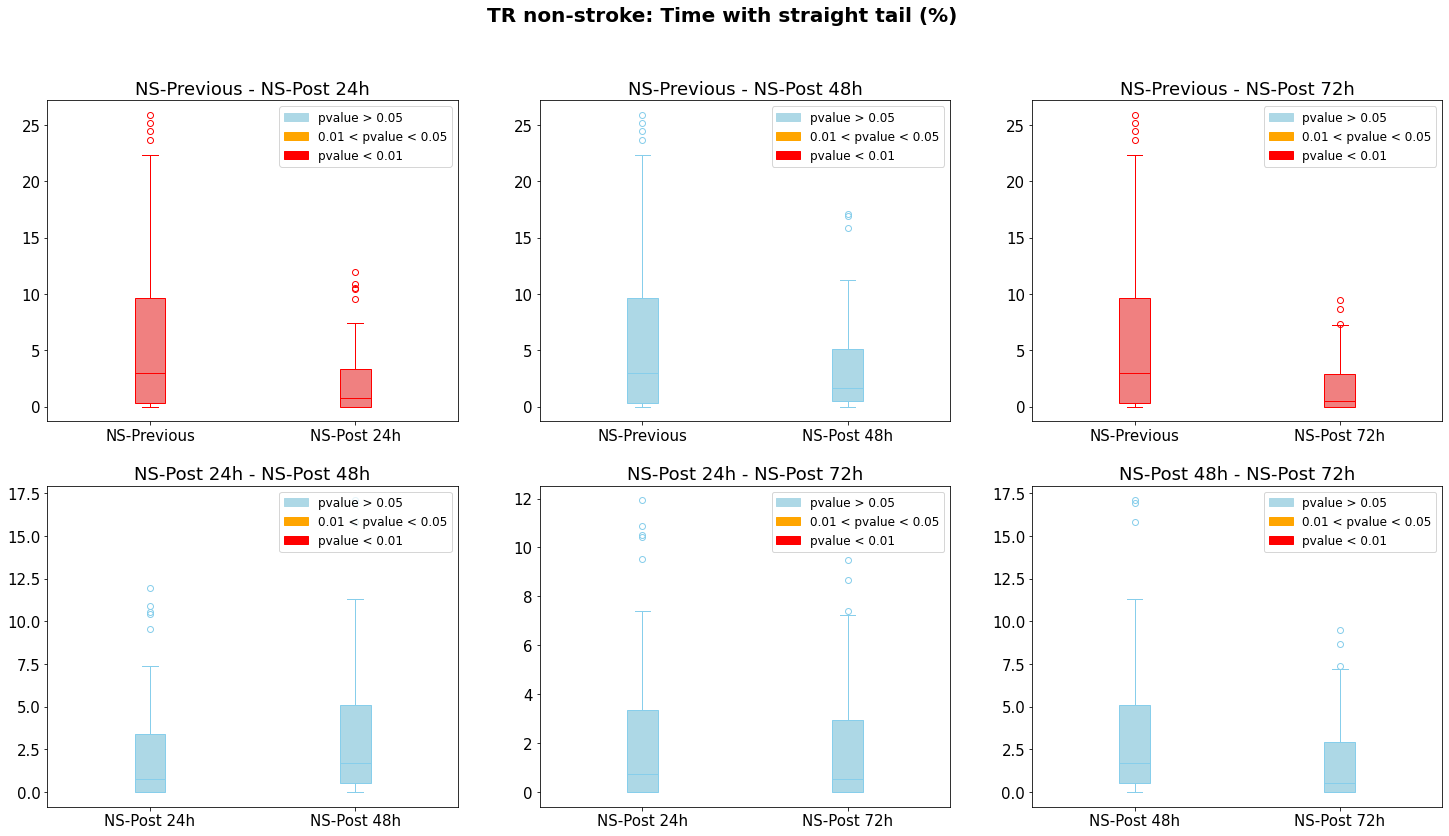

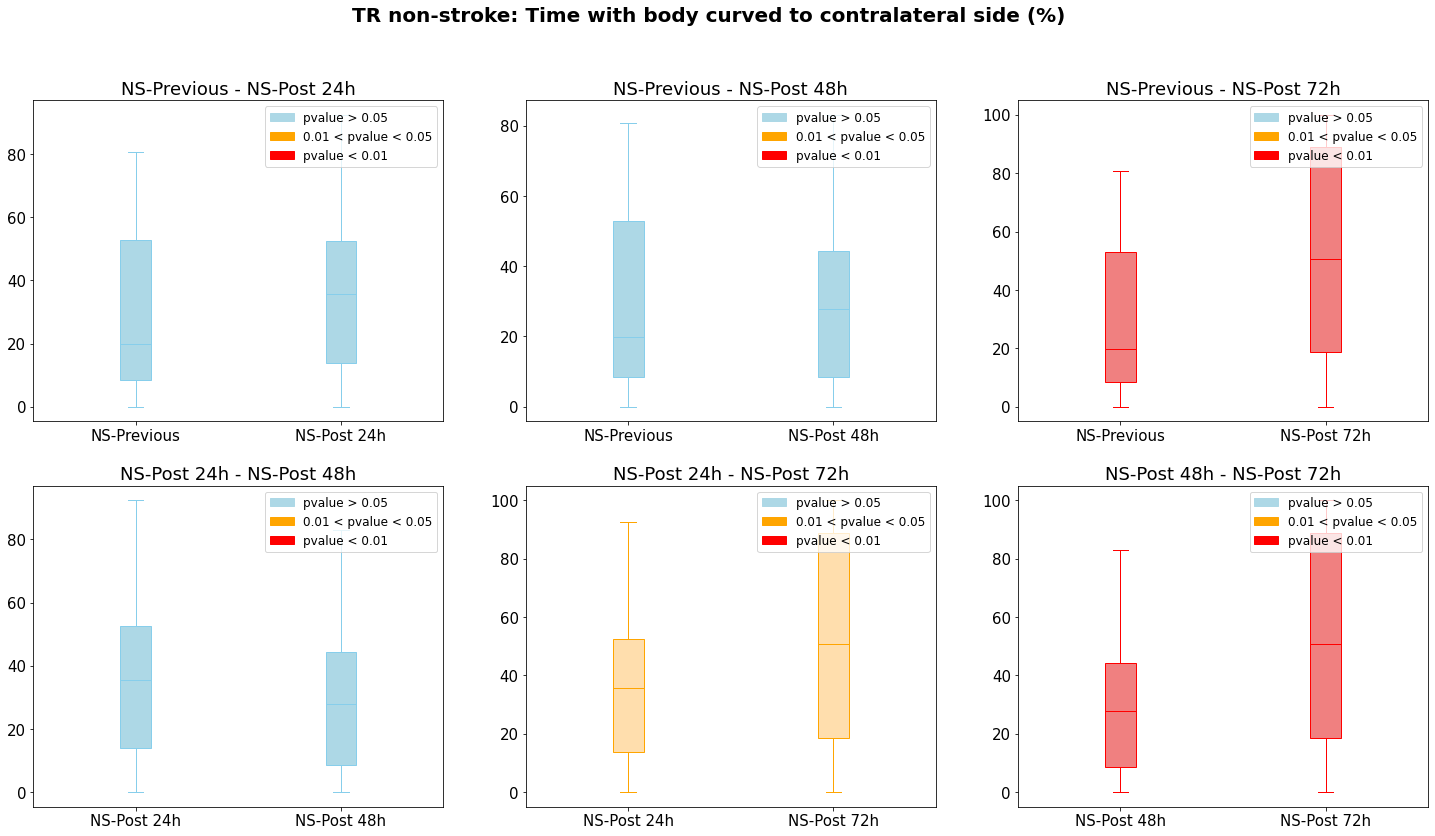

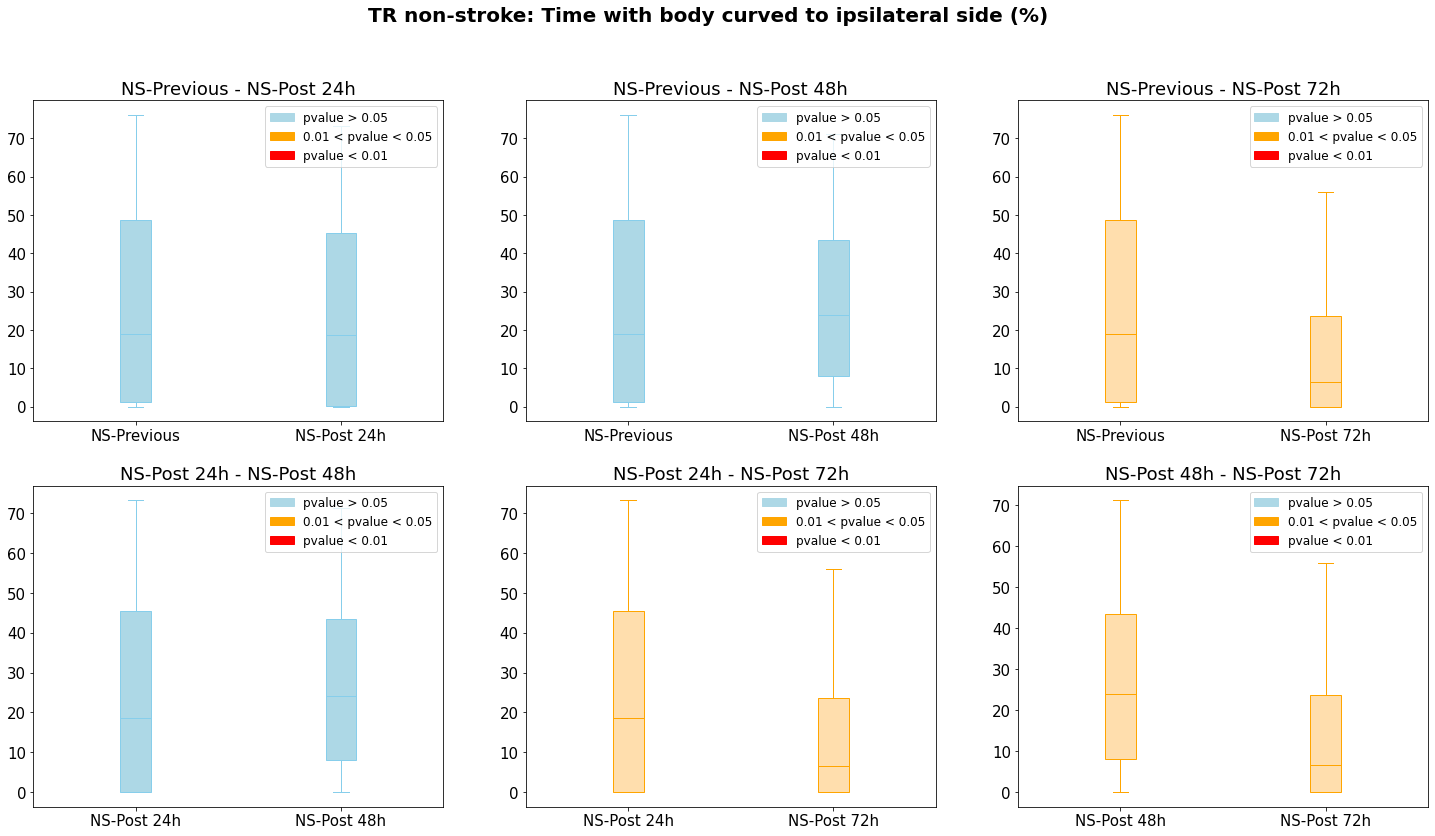

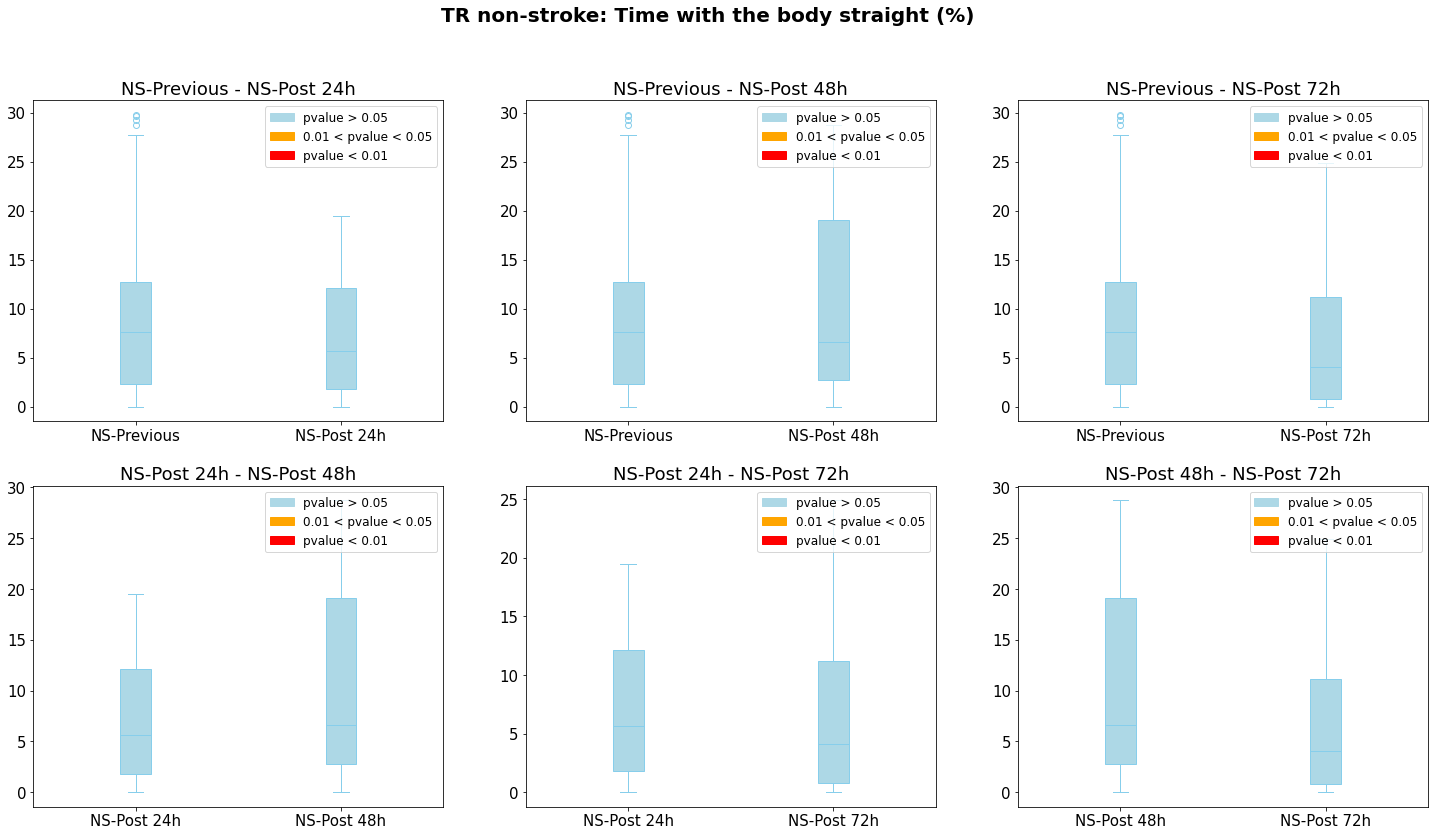

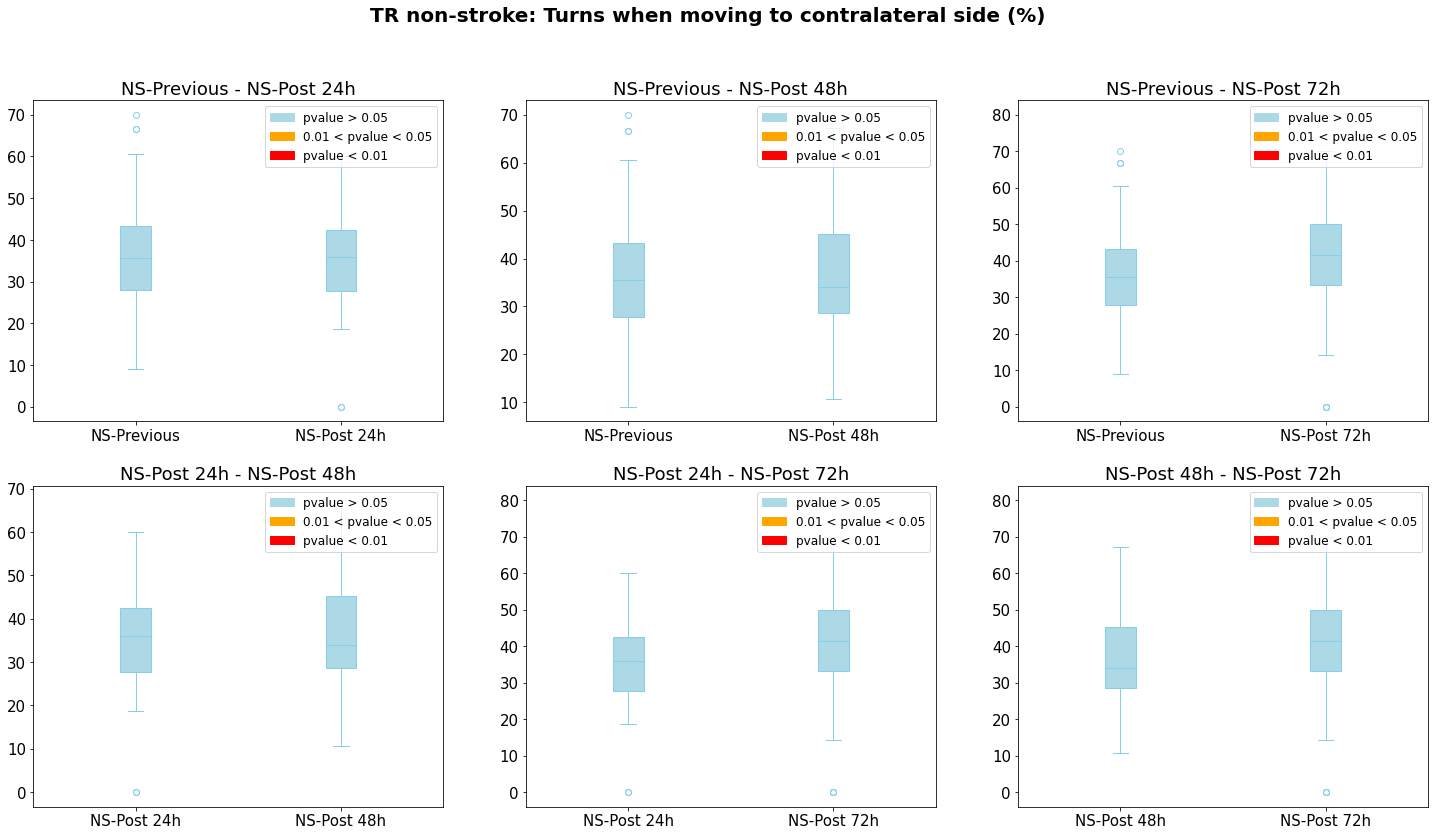

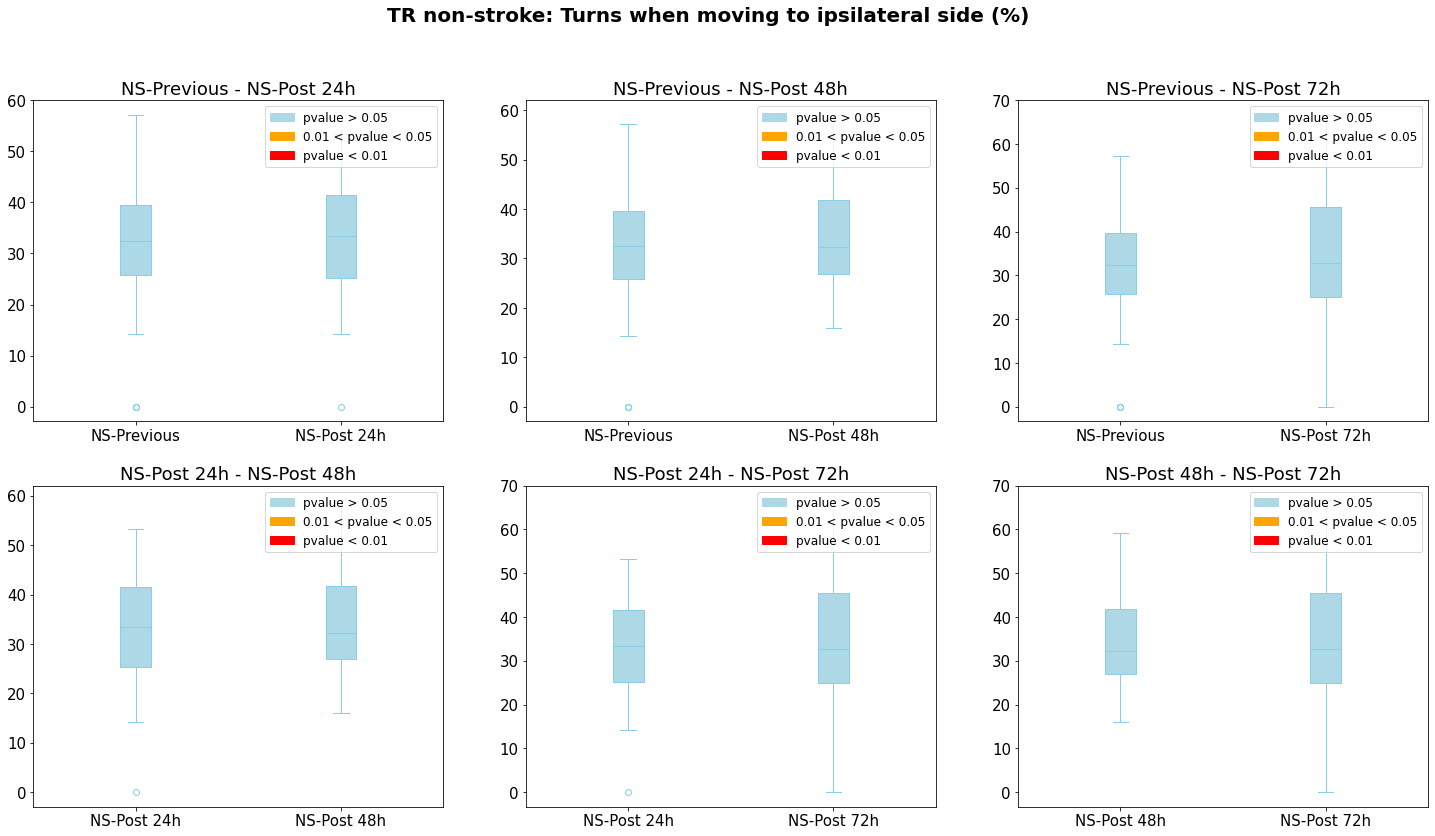

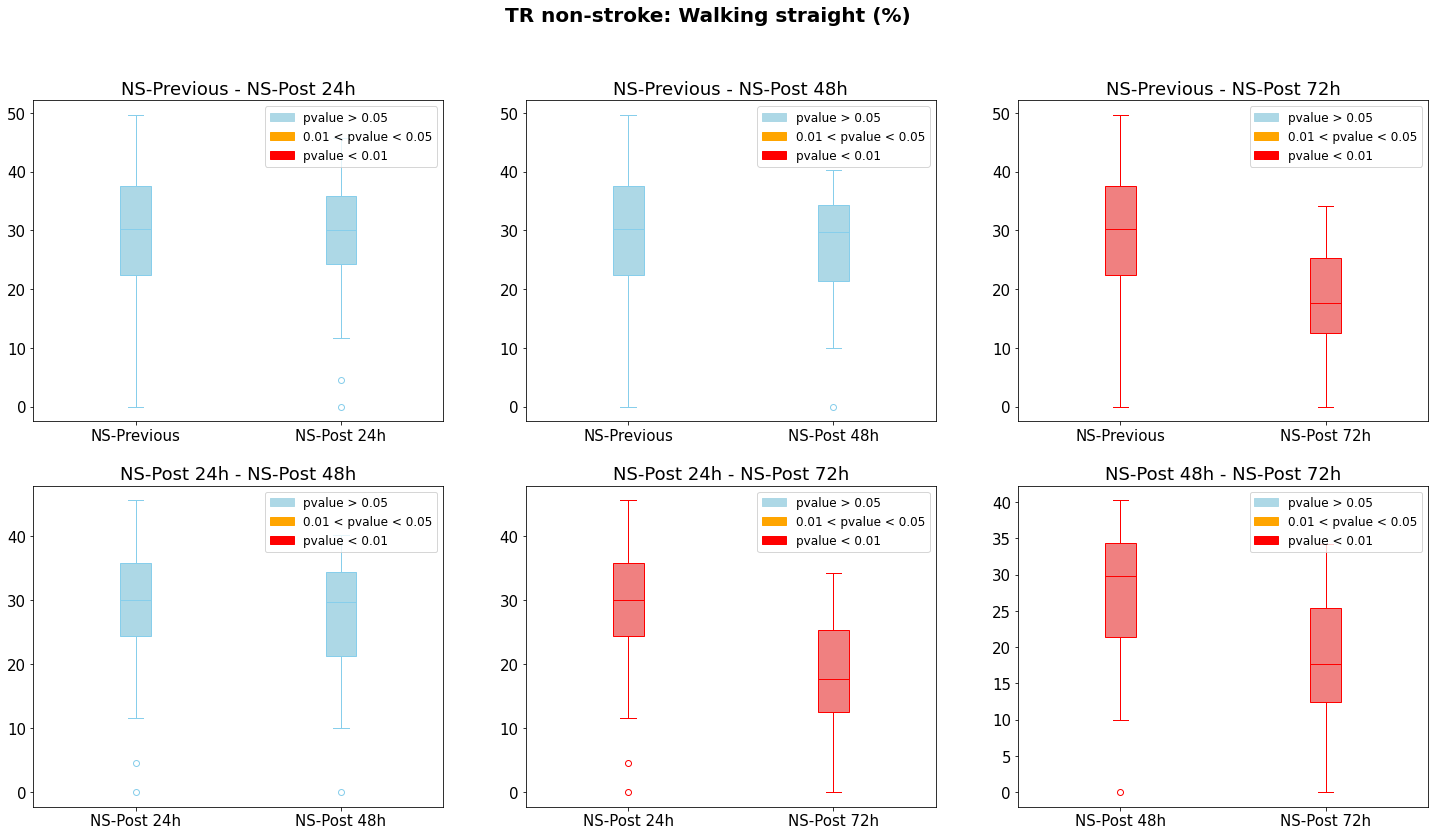

In [41]:

for k,i in enumerate(param):
     # PREVIOUS NON STROKE
    trpre = data.loc[data["Test"] == "TR - PRE"]; 
    trpre_1 = trpre.loc[(trpre["% Infarct"] <= limits[0]) & (trpre["% Infarct"] >= 0)]
    trpre_1 = np.array(trpre_1[i].dropna())
    trpre_1 = trpre_1[trpre_1 <= (np.mean(trpre_1)*0.9 + np.mean(trpre_1))]
    
    # POST 24H NON STROKE
    trpost24h = data.loc[data["Test"] == "TR - POST - 24H"]; 
    trpost24h_1 = trpost24h.loc[(trpost24h["% Infarct"] <= limits[0]) & (trpost24h["% Infarct"] >= 0)]
    trpost24h_1 = np.array(trpost24h_1[i].dropna())
    trpost24h_1 = trpost24h_1[trpost24h_1 <= (np.mean(trpost24h_1)*0.9 + np.mean(trpost24h_1))]
    
    # POST 48H NON STROKE
    trpost48h = data.loc[data["Test"] == "TR - POST - 48H"]; 
    trpost48h_1 = trpost48h.loc[(trpost48h["% Infarct"] <= limits[0]) & (trpost48h["% Infarct"] >= 0)]
    trpost48h_1 = np.array(trpost48h_1[i].dropna())
    trpost48h_1 = trpost48h_1[trpost48h_1 <= (np.mean(trpost48h_1)*0.9 + np.mean(trpost48h_1))]
    
    # POST 72H NON STROKE
    trpost72h = data.loc[data["Test"] == "TR - POST - 72H"]; 
    trpost72h_1 = trpost72h.loc[(trpost72h["% Infarct"] <= limits[0]) & (trpost72h["% Infarct"] >= 0)]
    trpost72h_1 = np.array(trpost72h_1[i].dropna())
    trpost72h_1 = trpost72h_1[trpost72h_1 <= (np.mean(trpost72h_1)*0.9 + np.mean(trpost72h_1))]
    
    nonstroke = [trpre_1, trpost24h_1, trpost48h_1, trpost72h_1]
    tit = ['NS-Previous', 'NS-Post 24h', 'NS-Post 48h', 'NS-Post 72h']
    
    plt.figure(figsize=(25,13))
    plt.suptitle('TR non-stroke: {}'.format(title[k]), fontsize=20, fontweight = 'bold')
    for j in range(3):
        fvalue, pvalue = stats.f_oneway(nonstroke[0],nonstroke[j+1])
        plt.subplot(2,3,j+1)
        if pvalue > 0.05:
            boxcolor = 'skyblue'
            incolor = 'lightblue'
        if (pvalue < 0.05) and (pvalue > 0.01):
            boxcolor = 'orange'
            incolor = 'navajowhite'
        if pvalue < 0.01:
            boxcolor = 'red'
            incolor = 'lightcoral'

        box = plt.boxplot([nonstroke[0],nonstroke[j+1]], labels = ('NS-Previous','{}'.format(tit[j+1])), patch_artist = True)    
        plt.title('NS-Previous - {}'.format(tit[j+1]), fontsize=18)
        red_patch = mpatches.Patch(color='red', label='pvalue < 0.01')
        orange_patch = mpatches.Patch(color='orange', label='0.01 < pvalue < 0.05')
        blue_patch = mpatches.Patch(color='lightblue', label='pvalue > 0.05')
        plt.legend(handles=[blue_patch, orange_patch, red_patch], fontsize=12,loc='upper right')
        plt.tick_params(labelsize = 15)

        for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
            plt.setp(box[item], color = boxcolor)
            plt.setp(box["boxes"], facecolor = incolor)
            plt.setp(box["fliers"], markeredgecolor = boxcolor)
            
    for j in range(2):
        fvalue, pvalue = stats.f_oneway(nonstroke[1],nonstroke[j+2])
        plt.subplot(2,3,j+4)
        if pvalue > 0.05:
            boxcolor = 'skyblue'
            incolor = 'lightblue'
        if (pvalue < 0.05) and (pvalue > 0.01):
            boxcolor = 'orange'
            incolor = 'navajowhite'
        if pvalue < 0.01:
            boxcolor = 'red'
            incolor = 'lightcoral'

        box = plt.boxplot([nonstroke[1],nonstroke[j+2]], labels = ('NS-Post 24h','{}'.format(tit[j+2])), patch_artist = True)    
        plt.title('NS-Post 24h - {}'.format(tit[j+2]), fontsize=18)
        red_patch = mpatches.Patch(color='red', label='pvalue < 0.01')
        orange_patch = mpatches.Patch(color='orange', label='0.01 < pvalue < 0.05')
        blue_patch = mpatches.Patch(color='lightblue', label='pvalue > 0.05')
        plt.legend(handles=[blue_patch, orange_patch, red_patch], fontsize=12,loc='upper right')
        plt.tick_params(labelsize = 15)

        for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
            plt.setp(box[item], color = boxcolor)
            plt.setp(box["boxes"], facecolor = incolor)
            plt.setp(box["fliers"], markeredgecolor = boxcolor)
            
    fvalue, pvalue = stats.f_oneway(nonstroke[2],nonstroke[3])
    plt.subplot(2,3,6)
    if pvalue > 0.05:
        boxcolor = 'skyblue'
        incolor = 'lightblue'
    if (pvalue < 0.05) and (pvalue > 0.01):
        boxcolor = 'orange'
        incolor = 'navajowhite'
    if pvalue < 0.01:
        boxcolor = 'red'
        incolor = 'lightcoral'

    box = plt.boxplot([nonstroke[2],nonstroke[3]], labels = ('NS-Post 48h','{}'.format(tit[3])), patch_artist = True)    
    plt.title('NS-Post 48h - {}'.format(tit[3]), fontsize=18)
    red_patch = mpatches.Patch(color='red', label='pvalue < 0.01')
    orange_patch = mpatches.Patch(color='orange', label='0.01 < pvalue < 0.05')
    blue_patch = mpatches.Patch(color='lightblue', label='pvalue > 0.05')
    plt.legend(handles=[blue_patch, orange_patch, red_patch], fontsize=12,loc='upper right')
    plt.tick_params(labelsize = 15)

    for item in ["boxes", "whiskers", "fliers", "medians", "caps"]:
        plt.setp(box[item], color = boxcolor)
        plt.setp(box["boxes"], facecolor = incolor)
        plt.setp(box["fliers"], markeredgecolor = boxcolor)
    path = './NOstroke/TRseparated{}.png'.format(k)
    plt.savefig(path)
